In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import scipy.optimize as sco
import scipy.interpolate as sci




In [2]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt

0.001 0.02
0.002 0.025
-0.001 0.04


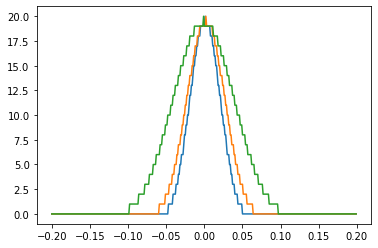

In [47]:
from matplotlib import pyplot as mp
import numpy as np
from functools import reduce

def gaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))*20).astype(int)

x_values = np.arange(-0.2,0.2,0.001)

Synthetic_Stocks = []

for mu, sig in [(0.001, 0.02), (0.002, 0.025), (-0.001, 0.04)]:
    

    print(mu, sig)
    
    mp.plot(x_values, gaussian(x_values, mu, sig))
    
    values = gaussian(x_values, mu, sig)


    Final_Stock = []

    for idx,x in enumerate(values):
        a = np.empty(x)
        a.fill(round(x_values[idx],3))
        
        Final_Stock.extend(list(a))

    
    Synthetic_Stocks.append(Final_Stock)
    
    



In [48]:
#Fill with zeros
maxL = max([len(Synthetic_Stocks[0]),len(Synthetic_Stocks[1]),len(Synthetic_Stocks[2])])
for i in range(0,3):
    a = np.empty(maxL - len(Synthetic_Stocks[i]))
    a.fill(0)
    Synthetic_Stocks[i].extend(a)
    print('mean {}'.format(np.mean(Synthetic_Stocks[i])))

    

mean 0.0005005336179295611
mean 0.0012529348986125924
mean -0.001000000000000003


In [49]:
Synthetic_Stocks.append([0 for x in range(0, maxL)])

In [50]:
import random
random.shuffle(Synthetic_Stocks[0])
random.shuffle(Synthetic_Stocks[1])
random.shuffle(Synthetic_Stocks[2])

In [51]:
initial_Value = 1000
for a in range(0,3):
    for i,num in enumerate(Synthetic_Stocks[a]):
        if i == 0:
            Synthetic_Stocks[a][i] = initial_Value
        else: 
            if Synthetic_Stocks[a][i]==0.0:
                Synthetic_Stocks[a][i] = Synthetic_Stocks[a][i-1]
            else:
                Synthetic_Stocks[a][i] = Synthetic_Stocks[a][i-1] + Synthetic_Stocks[a][i-1]*Synthetic_Stocks[a][i]
        

    

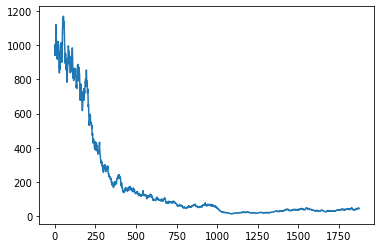

In [52]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


plt.plot(Synthetic_Stocks[2])


In [388]:
import datetime

start = datetime.datetime.strptime("01-01-2020", "%d-%m-%Y")
date_generated = [(start + datetime.timedelta(days=x)).strftime('%Y%m%d') for x in range(0, maxL)]

for date in date_generated[:5]:
    print(date)
Cash_Change_1 = [1 for x in range(0, maxL)]

20200101
20200102
20200103
20200104
20200105


In [223]:

synthetic_df = pd.DataFrame(list(zip(Synthetic_Stocks[0], Synthetic_Stocks[1],Synthetic_Stocks[2] )),columns =['Stock1', 'Stock2','Stock3'])
dates_df = pd.DataFrame(list(zip(date_generated,date_generated,date_generated)),columns =['Stock1', 'Stock2','Stock3'])
Cash_Change_1_df = pd.DataFrame(list(zip(Cash_Change_1,Cash_Change_1,Cash_Change_1)),columns =['Stock1', 'Stock2','Stock3'])
dates_df_squezed = pd.DataFrame(dates_df.stack().squeeze()).reset_index().drop(columns=['level_0','level_1'])
dates_df_squezed.columns = ['datadate']
Cash_Change_1_df = pd.DataFrame(Cash_Change_1_df.stack().squeeze()).reset_index().drop(columns=['level_0','level_1'])
df1_close = pd.DataFrame(synthetic_df.stack().squeeze()).reset_index().drop(columns=['level_0'])
df1_final = pd.concat([df1_close,dates_df_squezed,Cash_Change_1_df], axis=1)
df1_final.columns =['tic', 'daily_return','datadate','CashChange']
df1_final.loc[df1_final.tic == 'Stock1', 'tic'] = 'AAPL'
df1_final.loc[df1_final.tic == 'Stock2', 'tic'] = 'CL=F'
df1_final.loc[df1_final.tic == 'Stock3', 'tic'] = 'TSLA'
df1_final =df1_final[['datadate', 'daily_return','tic','CashChange']]

In [224]:
synthetic_df = df1_final

In [26]:
synthetic_df.to_csv('synthetic_portolio_ready.csv')

In [89]:
asset_data = pd.read_csv("synthetic_portolio_ready.csv")

In [90]:
# Create a list of symbols
symbols = [
  "TSLA", "MSFT", "CL=F", 'Cash'
]

In [225]:
synthetic_df = pd.DataFrame(list(zip(Synthetic_Stocks[0], Synthetic_Stocks[1],Synthetic_Stocks[2], Synthetic_Stocks[3] )),columns =['Stock1', 'Stock2','Stock3','Cash'])

asset_data = synthetic_df
daily_returns = synthetic_df
asset_data

KeyboardInterrupt: 

In [94]:
# Compute daily simple returns
daily_returns = (
  asset_data.pct_change()
            .dropna(
              # Drop the first row since we have NaN's
              # The first date 2011-09-13 does not have a value since it is our cut-off date
              axis = 0,
              how = 'any',
              inplace = False
              )
)
# Examine the last 5 rows
daily_returns

,Stock1,Stock2,Stock3,Cash


In [97]:
print(range(0, maxL))

daily_returns.mean()*len(range(0, maxL))

range(0, 332)


Stock1   -0.660
Stock2    0.664
Stock3    1.608
Cash      0.000
dtype: float64

In [45]:
# Function for computing portfolio return
def portfolio_returns(weights):
    return (np.sum(daily_returns.mean() * weights)) * 251

In [107]:
a = daily_returns.cov()
a.to_csv('covariance.csv', index=False)
b = pd.read_csv('covariance.csv')

np.sqrt(np.transpose(weights) @ (b * 251) @ weights)

0.07392001390056635

In [46]:
# Function for computing standard deviation of portfolio returns
def portfolio_sd(weights):
    return np.sqrt(np.transpose(weights) @ (daily_returns.cov() * 251) @ weights)

In [52]:
# instantiate empty list containers for returns and sd
list_portfolio_returns = []
list_portfolio_sd = []
# For loop to simulate 5000 random weight vectors (numpy array objects)
for p in range(10000):
  # Return random floats in the half-open interval [0.0, 1.0)
    weights = np.random.random(size = 4) 
    # Normalize to unity
    # The /= operator divides the array by the sum of the array and rebinds "weights" to the new object
    weights /= np.sum(weights) 
    # Lists are mutable so growing will not be memory inefficient
    list_portfolio_returns.append(portfolio_returns(weights))
    list_portfolio_sd.append(portfolio_sd(weights))
    # Convert list to numpy arrays
    port_returns = np.array(object = list_portfolio_returns)
    port_sd = np.array(object = list_portfolio_sd)

In [53]:
# Max expected return
print(port_returns)

round(max(port_returns), 4)


[0.26698918 0.3992382  0.27933582 ... 0.61820848 0.12336858 0.58227228]


1.1192

In [54]:
# Min expected return
round(min(port_returns), 4)

-0.4019

In [55]:
# Max sd
round(max(port_sd), 4)


0.186

In [56]:
round(min(port_sd), 4)

0.012

In [57]:
# User defined Sharpe ratio function
# Negative sign to compute the negative value of Sharpe ratio
def sharpe_fun(weights):
    return - (portfolio_returns(weights) / portfolio_sd(weights))

In [58]:
# We use an anonymous lambda function
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [59]:
# This creates 12 tuples of (0, 1), all of which exist within a container tuple
# We essentially create a sequence of (min, max) pairs
bounds = tuple(
  (0, 1) for w in weights
)

In [60]:
bounds

((0, 1), (0, 1), (0, 1), (0, 1))

In [61]:
# Repeat the list with the value (1 / 12) 12 times, and convert list to array
equal_weights = np.array(
  [1 / len(symbols)] * len(symbols)
)
equal_weights

array([0.25, 0.25, 0.25, 0.25])

In [62]:
# Minimization results
max_sharpe_results = sco.minimize(
  # Objective function
  fun = sharpe_fun, 
  # Initial guess, which is the equal weight array
  x0 = equal_weights, 
  method = 'SLSQP',
  bounds = bounds, 
  constraints = constraints
)
max_sharpe_results

     fun: -8.248833472932093
     jac: array([ 4.12136149e+00,  3.39508057e-04, -7.68899918e-05,  0.00000000e+00])
 message: 'Optimization terminated successfully'
    nfev: 41
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.        , 0.16758009, 0.74065887, 0.09176104])

In [63]:

for i in range(0,4):
    w = round(max_sharpe_results["x"][i],10)
    print(w)

0.0
0.167580088
0.7406588722
0.0917610398


In [64]:
# Expected return
max_sharpe_port_return = portfolio_returns(max_sharpe_results["x"])
round(max_sharpe_port_return, 4)

0.9845

In [65]:
# Standard deviation
max_sharpe_port_sd = portfolio_sd(max_sharpe_results["x"])
round(max_sharpe_port_sd, 4)

0.1194

In [66]:
# Sharpe ratio
max_sharpe_port_sharpe = max_sharpe_port_return / max_sharpe_port_sd
round(max_sharpe_port_sharpe, 4)

8.2488

In [67]:
# Minimize sd
min_sd_results = sco.minimize(
  # Objective function
  fun = portfolio_sd, 
  # Initial guess, which is the equal weight array
  x0 = equal_weights, 
  method = 'SLSQP',
  bounds = bounds, 
  constraints = constraints
)

In [68]:
# Expected return
min_sd_port_return = portfolio_returns(min_sd_results["x"])
round(min_sd_port_return, 4)

0.0

In [69]:
# Standard deviation
min_sd_port_sd = portfolio_sd(min_sd_results["x"])
round(min_sd_port_sd, 4)

0.0

In [70]:
# Sharpe ratio
min_sd_port_sharpe = min_sd_port_return / min_sd_port_sd
round(min_sd_port_sharpe, 4)

3.3374

In [72]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [73]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2018,1,1)
end = datetime.datetime(2022,11,19)

In [74]:
def get_stock(ticker):
    data = web.DataReader(f"{ticker}","yahoo",start,end)
    data[f'{ticker}'] = data["Close"]
    data = data[[f'{ticker}']] 
    print(data.head())
    return data 

In [ ]:
pfizer = get_stock("PFE")
jnj = get_stock("JNJ")

In [77]:
portfolio = asset_data
portfolio.to_csv("portfolio.csv", index=False)

In [78]:
portfolio = pd.read_csv("portfolio.csv")



In [79]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage


mu = mean_historical_return(portfolio)
S = CovarianceShrinkage(portfolio).ledoit_wolf()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pypfopt/expected_returns.py:31: UserWarning: Some returns are NaN. Please check your price data.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pypfopt/expected_returns.py:35: UserWarning: Some returns are infinite. Please check your price data.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufun

In [80]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

ValueError: P must be symmetric/Hermitian.

In [81]:
ef.portfolio_performance(verbose=True)

ValueError: Weights is None

In [82]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000)

allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

TypeError: weights should be a dictionary of {ticker: weight}

In [202]:
from __future__ import division
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
import csv


matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pickle
# initial amount of money we have in our account
INITIAL_ACCOUNT_BALANCE = 1

# [100,-50,100]

# total number of stocks in our portfolio
STOCK_DIM = 3
# transaction fee: 1/1000 reasonable percentage
TRANSACTION_FEE_PERCENT = 0.0025
REWARD_SCALING = 100000


#[-0.7*HMAX_NORMALIZE, 0.5*HMAX_NORMALIZE,0.3*HMAX_NORMALIZE]
# w1, w2, w3,
class BasicStockEnvTrain(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}

    def __init__(self, df, day=0):
        # super(StockEnv, self).__init__()
        # money = 10 , scope = 1
        self.day = day
        self.df = df


        # action_space normalization and shape is STOCK_DIM
        self.action_space = spaces.Box(low=0, high=1, shape=(STOCK_DIM + 1,))
        # Shape = 181: [Current Balance]+[prices 1-30]+[owned shares 1-30]
        # +[macd 1-30]+ [rsi 1-30] + [cci 1-30] + [adx 1-30]
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(7,))
        # load data from a pandas dataframe
        self.data = self.df.loc[self.day, :]

        self.terminal = False
        # initalize state
        print(self.data)
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                     [0] * STOCK_DIM + \
                     self.data.daily_return.values.tolist()
        # initialize reward
        self.reward = 0
        self.cost = 0
        # memorize all the total balance change
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.rewards_memory = []
        self.trades = 0
        self.P_t_0 = 0
        # self.reset()
        self._seed()
        self.W_t_1 = [1,0,0,0]
        self.W_t =   [1,0,0,0]
        self.Yt = self.data.daily_return.values.tolist()
        self.P_t_1 =  1
        self.whole_weights = [0.25,0.25,0.25,0.25]




    def make_actions(self, index, action):
        available_amount = (1 -  sum(np.array(self.state[1:(index)])))
        if available_amount > 0:
            self.trades += 1
            self.state[index] = min(available_amount, action)



    def step(self, actions):
        # print(self.day)

        state_list = []


        # print(actions)

        actions = actions
        # print(np.array(self.state[1:29]))


        # actions = (actions.astype(int))
        #print("actions {}".format(actions))
        self.state[0] = actions[0]

        for index in range(1,STOCK_DIM+1):
            # print('take buy action: {}'.format(actions[index]))
            #print("while buying actions {}".format(self.state))
            self.make_actions(index, actions[index])

        self.state[0] = (1 - self.state[1] - self.state[2] - self.state[3])


        lenge = len(self.df.index.unique()) - 1
        #zprint(lenge)
        for i in range(lenge):
            #print("state before buying actions {}".format(self.state))
            v_t_1 = np.array([1] + self.state[(STOCK_DIM + 1):(STOCK_DIM * 2 + 1)])
            self.day = i
            self.data = self.df.loc[self.day, :]
            # load next state


            # print("stock_shares:{}".format(self.state[29:]))
            self.state = [self.state[0]] + \
                         list(self.state[(1):(STOCK_DIM+ 1)]) + \
                         self.data.daily_return.values.tolist()

            v_t_0 = np.array( [1] + self.state[(STOCK_DIM + 1):(STOCK_DIM * 2 + 1)])

            #print("state after buying actions {}".format(self.state))

            self.W_t = np.array(self.state[:(STOCK_DIM + 1)])

            Y_t = np.divide(v_t_0,v_t_1)
            #print("-------------------")
            #print("Y_t:{}".format(Y_t))
            #print("P_t_1:{}".format(self.P_t_1))

            #print("self.P_t_1 * Y_t:{}".format(self.P_t_1 * Y_t))
            #print("W_t_1:{}".format(self.W_t_1))


            """
            Compare
            """
            self.cost = TRANSACTION_FEE_PERCENT * (
                np.abs(self.W_t_1[1:] - self.W_t[1:])).sum()

            self.cost = 0

            self.P_t_0 = self.P_t_1 * (1 - self.cost) * np.dot(Y_t,self.W_t_1)
            #print("P_t_0:{}".format(self.P_t_0))

            self.W_t_1 = self.W_t

            self.P_t_0 = np.clip(self.P_t_0, 0, np.inf)

            self.asset_memory.append(self.P_t_0)


            self.reward = np.log(self.P_t_0/self.P_t_1) # or this: (self.P_t_0/self.P_t_1)

            self.reward = self.reward * REWARD_SCALING

            self.rewards_memory.append(self.reward)

            self.P_t_1 = self.P_t_0

            state_list.append(self.state)


            #print("step_reward:{}".format(self.reward))

        #(np.sum(daily_returns.mean() * weights)) * 251
        theFinalReward = self.P_t_0 * 100

        #print(self.state)

        plt.plot(self.asset_memory, 'r')
        plt.savefig('results/account_value_train.png')
        plt.close()

        print(self.state)
        print("Portfolio Value:{}".format(self.P_t_0))
        print(self.reward)
        #print("Portfolio Value:{}".format(self.P_t_0))
        #print("Sharpe: ",sharpe)

        self.terminal = True


        return self.state, theFinalReward, self.terminal, {}

    def reset(self):
        self.whole_weights = [0.25, 0.25, 0.25, 0.25]
        self.P_t_1 =  1
        self.P_t_0 = 0
        self.W_t_1 = [1, 0 ,0 ,0]
        self.W_t   = [1, 0 ,0 ,0]
        self.Yt = self.data.daily_return.values.tolist()
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.day = 0
        self.data = self.df.loc[self.day, :]
        self.cost = 0
        self.trades = 0
        self.terminal = False
        self.reward = 0
        self.rewards_memory = []
        # initiate state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                     [0] * STOCK_DIM + \
                     self.data.daily_return.values.tolist()
        # iteration += 1
        return self.state

    def render(self, mode='human'):
        return self.state

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]




In [203]:

#from stable_baselines3.ddpg.policies import LnMlpPolicy
from stable_baselines3.common.callbacks import BaseCallback
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """
    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        
        if self.n_calls % self.check_freq == 0:
            # Retrieve training reward
            x, y = ts2xy(load_results(self.log_dir), 'timesteps')

            if len(x) > 0:
            # Mean training reward over the last 100 episodes
                mean_reward = np.mean(y[-100:])
                if self.verbose > 0:
                    print("Num timesteps: {}".format(self.num_timesteps))
                    print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(self.best_mean_reward, mean_reward))

                # New best model, you could save the agent here
                if mean_reward > self.best_mean_reward:
                    self.best_mean_reward = mean_reward
                    # Example for saving best model
                    if self.verbose > 0:
                        print("Saving new best model to {}".format(self.save_path))
                    self.model.save(self.save_path)

            return True

In [204]:
import gym
import time
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import HerReplayBuffer, DDPG, DQN, SAC, TD3
from stable_baselines3.common.logger import configure
from stable_baselines3.common import results_plotter
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
import os

import additional
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
import pandas as pd
import numpy as np
from additional import *

# Parallel environments

def data_split(df, start, end):
    """
    split the dataset into training or testing using date
    :param data: (df) pandas dataframe, start, end
    :return: (df) pandas dataframe
    """
    data = df[(df.datadate >= start) & (df.datadate < end)]
    data = data.sort_values(['datadate', 'tic'], ignore_index=True)

    # data  = data[final_columns]
    data.index = data.datadate.factorize()[0]

    return data


preprocessed_path = "/Users/egemenokur/PycharmProjects/VanillaAlgorithmicTrading/synthetic_portolio_ready.csv"
data = pd.read_csv(preprocessed_path, index_col=0)
#print(data.to_string())


train = data_split(data, start=20200101, end=20200401)
validate = data_split(data, start=20200101, end=20200401)
test = data_split(data, start=20200101, end=20200401)

print(data.daily_return.values.tolist())

print(train)
print(test)


env = BasicStockEnvTrain(train)


BATCHES = 1
TIMESTEPS = 1

seed = 3
env.seed(seed)

batch_number = []
batch_rewardsl = []
t_batch_number = []
t_batch_rewardsl = []
train_batch_rewardsl = []
batch_sharpeL_test = []
batch_FassetL_test = []

batch_sharpeL_validate = []
batch_FassetL_validate = []

batch_sharpeL_train = []
batch_FassetL_train = []

FIRSTMODEL = 0

# Create log dir
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

env = Monitor(env, log_dir)
model_class = DQN

for batch in range(FIRSTMODEL,BATCHES):
    env.reset()
    models_dir = f"models/{int(time.time())}/"
    logdir = f"logs/{int(time.time())}/"
    batch_number.append(batch)

    log_path = os.path.join('Training', 'Logs')
    print('First Model')
    #model = PPO("MlpPolicy", env, verbose=1, tensorboard_log=log_path)
    n_actions = env.action_space.shape[-1]
    print('n_actions:{}'.format(n_actions))
    #action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.15 * np.ones(n_actions))
    action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=float(0.1) * np.ones(n_actions))

    # Create RL model
    model = DDPG('MlpPolicy', env, action_noise=action_noise, verbose=0)
    #model = A2C('MlpPolicy', env, verbose=0)
    
    #model = SAC("MlpPolicy", env, verbose=1)
    model.learn(total_timesteps=40000, log_interval=1000)
    # Train the agent
    #time_steps = 1e4
    
    #model.learn(total_timesteps=int(time_steps), callback=callback)
    FIRSTMODEL = 1
    print('Model Finish')

    """
    rewardsl_train = []
    rewardsl_v = []
    t_rewardsl = []
    sharpel_train = []
    sharpel_v = []
    t_sharpel = []
    cumretl_train = []
    cumretl_v = []
    t_cumretl = []
    """
    score = 0

    model.save("DDPG.pth")

    model.load("DDPG.pth")

    from stable_baselines3.common.evaluation import evaluate_policy

    evaluate_policy(model, env, n_eval_episodes=10, render=True)


"""
df_scores = pd.DataFrame(list(zip(batch_number,train_batch_rewardsl,batch_rewardsl, t_batch_rewardsl,batch_sharpeL_test,batch_FassetL_test, batch_sharpeL_validate, batch_FassetL_validate, batch_sharpeL_train,batch_FassetL_train)))
df_scores.to_csv('CSVs/PPO_results_eval_mean.csv', mode='a', encoding='utf-8', index=True)
print('mean of scores:{}'.format(np.mean(df_scores)))
rewardsl = np.array(t_batch_rewardsl).mean()
print(rewardsl)

"""



[1000.0, 1000.0, 1000.0, 997.0, 977.0, 1014.0, 997.0, 1003.379, 1017.042, 981.048, 995.351968, 1031.280588, 981.048, 1026.207879008, 1043.655955056, 981.048, 1023.129255370976, 1059.31079438184, 983.010096, 1028.2449016478308, 1079.4376994750949, 983.010096, 1010.7647383198178, 1089.152638770371, 983.010096, 992.570973030061, 1091.330944047911, 983.010096, 1014.4075344367224, 1091.330944047911, 983.010096, 1019.479572108906, 1091.330944047911, 983.010096, 1014.3821742483614, 1095.696267824103, 977.112035424, 1003.2239703316294, 1101.1747491632234, 953.661346573824, 1003.2239703316294, 1093.4665259190808, 943.171071761512, 997.2046265096396, 1117.5227894893003, 943.171071761512, 1008.1738774012456, 1117.5227894893003, 943.171071761512, 1009.1820512786468, 1113.0526983313432, 932.7961899721352, 991.0167743556312, 1108.600487538018, 931.8633937821631, 992.9988079043424, 1108.600487538018, 925.340350025688, 981.0828222094904, 1110.817688513094, 925.340350025688, 961.4611657653004, 1118.593

[0.0, 0.5987428439629862, 0.40125715603701384, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.0092027499353058
143.793750930029
[0.04772972070552539, 0.23498784389373045, 0.10229994856479041, 0.6149824868359537, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.402836340846024
864.8364842344018
[0.3560524811759513, 0.2519100005582692, 0.37947833931457825, 0.012559178951201289, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.0782789298348072
499.4451402010018
[0.0, 0.7200224127205024, 0.2799775872794976, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:0.9507343849787792
-232.33917798946777
[0.0, 0.807264268197656, 0.19273573180234405, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:0.9106140961175307
-503.78610527440725
[0.0, 0.496769387127021, 0.503230612872979, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:

[0.17472392753591703, 0.1902684372782048, 0.3717196949178999, 0.2632879402679782, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2562135238424432
924.7866551513965
[0.0, 0.7026655053894306, 0.2973344946105694, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:0.9589071243612028
-178.4221443912937
[0.0, 0.3859751058370474, 0.5439271966890368, 0.07009769747391581, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.141594581949013
765.4909508661478
[0.0, 0.9594244464509745, 0.040575553549025534, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:0.844335691443709
-978.9923137553651
[0.0, 0.9810404355272624, 0.01895956447273761, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:0.8352878756625693
-1046.684025754601
[0.13464499782655498, 0.061909177339856736, 0.5499398331086661, 0.2535059917249221, 827.4252990014966, 1349.1587731815102, 1766.530840359036

[5.551115123125783e-17, 0.7578760872841175, 0.06706099768895063, 0.17506291502693183, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:0.9782258194986261
-437.90473285275556
[0.0, 0.5316936085933232, 0.46830639140667685, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.042923665486637
351.1326205974951
[0.0, 0.5093147399870384, 0.21240624583996426, 0.2782790141729974, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.1371123132860232
281.5879676470925
[0.0, 0.9981810608700454, 0.0018189391299545665, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:0.8281766610004889
-1100.3934714678103
[0.0, 0.008110554762586986, 0.01700242515198852, 0.9748870200854245, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7481052233920213
1476.4602540728433
[0.0, 0.007803199862522148, 0.9921968001374779, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Po

[0.0, 0.0, 0.9983693531024618, 0.0016306468975382238, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349775353957756
1979.4633897087508
[0.0, 0.006715141352794385, 0.9932848586472056, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.344826044130021
1959.8518838115624
[0.0, 0.007077226554017324, 0.9929227734459827, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.344592782107565
1958.7511980956222
[0.0, 0.001925398951124313, 0.9980746010488757, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.347915168443916
1974.4108557045674
[0.0, 0.005182227324994515, 0.9948177726750055, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3458139857286386
1964.5115826139695
[0.0, 0.010637437734064559, 0.9893625622659354, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.342301196720621
1947.9280348958173
[0.0, 0.0059833390

[0.0, 0.0011273501561303023, 0.9988726498438697, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.348430496625424
1976.8364106418776
[0.0, 0.0, 0.9956773484598324, 0.0043226515401676435, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3507937032663955
1978.1437603345348
[0.0, 0.00018832653057393456, 0.999811673469426, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3490370878374534
1979.690363034084
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0, 0.9939435853625765, 0.006056414637423457, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3514498578056626
1977.29385484267
[0.0, 0.0, 0.9908609736443856, 0.009139026355614366, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3526170646081455
1975.7827143865723
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1

[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.004419608935731623, 0.9955803910642684, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3463057296786785
1966.829682619908
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0, 0.9975059887951176, 0.0024940112048823515, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3501018923867694
1979.0401676324918
[0.0, 0.0, 0.99

[0.0, 0.0, 0.9975904740051652, 0.0024095259948347936, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3500699361746547
1979.0815824488977
[0.0, 0.0, 0.9962909154926765, 0.0037090845073235457, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3505615500198358
1978.444534408829
[0.0, 0.0, 0.9960972973172348, 0.003902702682765158, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3506348055346837
1978.3496217677891
[0.0, 0.0025147830699224216, 0.9974852169300776, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3475346979654763
1972.6194693745765
[0.0, 0.004384883210221957, 0.995615116789778, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3463281250823784
1966.9352357119508
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.002735486264385689, 0.993798011434

[0.0, 0.0, 0.9988670239597784, 0.001132976040221556, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3495871527936676
1979.7073476638311
[0.0, 5.2912983003805536e-05, 0.9994780744293228, 0.0004690125876734008, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349301900335918
1979.8720067554675
[0.0, 0.0, 0.9983759250026367, 0.0016240749973632784, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3497728685780672
1979.4666112541458
[0.0, 0.006035028640535067, 0.9939649713594649, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.345264285390609
1961.919293601145
[0.0, 0.0, 0.9977831438924534, 0.0022168561075466275, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349997061570248
1979.1760295430086
[0.0, 0.0011115817443659859, 0.998888418255634, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3484406806577591
1976.8843

[0.0, 0.0004167993409344706, 0.9957424465666667, 0.0038407540923988126, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3503417549006884
1977.1132143319267
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0070948946947701486, 0.9929051053052298, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3445814009090584
1958.6974892383112
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0019318750556138742, 0.9969870780831018, 0.001081046861284296, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.348319320018311
1973.86121482043
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368

[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.00028628358045235114, 0.9908600389190845, 0.008853677500463175, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3523235148296178
1975.052478347869
[0.0, 0.01094084475984819, 0.9877481959079348, 0.001310959332216921, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3425989417865798
1946.3627700920367
[0.0, 0.0, 0.9962401063174033, 0.00375989368259666, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3505807734126911
1978.419627494389
[0.0, 0.0, 0.9994574538021032, 0.0005425461978968427, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3493638982361564
1979.9967752457248
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.005951512940309711, 0.99404848705

[0.0, 0.0012388968027973735, 0.992079026823629, 0.006682076373573542, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3508847559591903
1973.221679510988
[0.0, 0.0, 0.9981663343773699, 0.0018336656226300985, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3498521337865943
1979.3638698808513
[0.0, 0.003771245148032787, 0.9962287548519673, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3467239302944491
1968.8004453125654
[0.0, 0.004025023530981275, 0.9945973133027355, 0.0013776631662831829, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.347080046983936
1967.3536566985006
[0.0, 0.0, 0.9980730462986467, 0.0019269537013533178, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349887415549661
1979.3181400090145
[0.0, 0.0004176185104486363, 0.9995823814895514, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.348888946

[0.0, 0.0, 0.9884893198124167, 0.011510680187583278, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.353515570569141
1974.6200801354464
[0.0, 0.003240228571064596, 0.9967597714289353, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.347066529329737
1970.4144911945648
[0.0, 0.0004905596269096368, 0.9995094403730904, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3488418238505477
1978.7718019905358
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.003108855722187831, 0.9968911442778121, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3471513002026392
1970.8138001434284
[0.0, 0.001740341125251843, 0.9938957405738686, 0.004363918300879455, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3496837032053355
1972.8340060100963
[0.0, 0.0, 1.0, 0, 827.425299

[0.0, 0.0019250391345880802, 0.9980749608654119, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3479154007495364
1974.4119493285923
[0.0, 0.001941951621241278, 0.9980580483787587, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3479044817085055
1974.3605456132266
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.01243125723895172, 0.9875687427610482, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3411479299805802
1942.4743186964677
[0.0, 0.002280433822085204, 0.9977195661779148, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3476859678036586
1973.3317591881519
[0.0, 0.002111478445021464, 0.9954036325585927, 0.002484888996385881, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3487336741212523
1972.6271168597345
[0.0, 0.0051053605752173215, 0

[0.0, 0.0, 0.9907212601018369, 0.00927873989816308, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3526699833716533
1975.7142242641544
[0.0, 0.008986268786089824, 0.9910137312139102, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3433635530298087
1952.9477903723
[0.0, 0.00848468059655677, 0.9915153194034432, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3436864252844567
1954.4726298955331
[0.0, 0.0031179896848732014, 0.9940354813215742, 0.002846528993552644, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3482201263632543
1969.390538106949
[0.0, 0.0, 0.9990134020746124, 0.0009865979253875778, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349531801497242
1979.7791020144548
[0.0, 0.0031806787585357266, 0.9968193212414642, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3471049543943816
1970.59549357979

[1.1102230246251565e-16, 0.0032714528572051482, 0.9938151705424269, 0.002913376600367945, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3481462604979073
1968.8913064711114
[0.0, 0.007480020638755969, 0.992519979361244, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3443333381220388
1957.5267491308161
[0.0, 0.009469339427044643, 0.9905306605729554, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3430526675625463
1951.479222638659
[0.0, 0.002228556912126145, 0.9977714430878739, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3477194558715526
1973.4894351104656
[0.0, 0.0, 0.9976560943200316, 0.00234390567996845, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.350045115916868
1979.1137496446786
[0.0, 0.005252504254611323, 0.9947474957453887, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.345768678726161

[0.0, 0.007280268767058562, 0.9927197312329414, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.344461994722313
1958.133974352354
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0054498341128974, 0.9918703668920348, 0.0026797989950677614, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3466519965756358
1962.3842832370754
[0.0, 0.0, 0.9995888121536327, 0.0004111878463672891, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3493142323899765
1980.0611667450125
[0.0, 0.0023666366708786635, 0.9976333633291213, 0, 827.4252990014966, 1349.1587731815102, 1766.

[0.0, 0.003506716253955211, 0.9964932837460447, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3468945879731566
1969.604494601923
[0.0, 0.0, 0.9945691090870714, 0.005430890912928588, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.351213097390556
1977.600492752829
[0.0, 0.007302870343943335, 0.9926971296560567, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.34444743688705
1958.0652680595956
[0.0, 0.0030212796050827495, 0.9969787203949172, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.347207813095734
1971.079987648709
[0.0, 0.0006095656470554434, 0.9993904343529445, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3487649446220413
1978.4101109807123
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.158773181

[0.0, 0.003122836590736977, 0.996877163409263, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.34714227854481
1970.7713052442753
[0.0, 0.0, 0.9971381902038213, 0.0028618097961786715, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.350241017215468
1978.8598718386525
[0.0, 0.0, 0.9987833339929413, 0.0012166660070587199, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3496187999873988
1979.6663229340318
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.000898293149950713, 0.9991017068500493, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3485784400526653
1977.532585717659
[0.0, 0.0, 0.9957653903648747, 0.0042346096351253415, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.35076038937392
1978.1869190363275
[0.0, 0.001227076867243937, 0.9968632341101582,

[0.0, 7.539630692299237e-05, 0.9997816978770868, 0.0001429058159901908, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349164080694943
1979.963531661081
[0.0, 0.004757721234458778, 0.9952422787655413, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3460876912295139
1965.8019430899226
[0.0, 0.0, 0.9898471509153046, 0.010152849084695381, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.353001100465717
1975.2857189606054
[0.0, 0.0, 0.994220310322238, 0.00577968967776199, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3513451138341068
1977.4295082680128
[0.0, 0.004400673560002177, 0.9955993264399978, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3463179414873985
1966.8872390253605
[0.0, 0.003965296456003298, 0.9960347035439967, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3465987529631054
1968.2106121896

[0.0, 0.005099293173877029, 0.994900706826123, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3458674545392568
1964.7636767738577
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.00042340206710678174, 0.9956787932937547, 0.003897804639138469, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3503590648625827
1977.0651797443227
[0.0, 0.0, 0.9976604220927353, 0.0023395779072646894, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3500434789897924
1979.1158711262244
[0.0, 0.002149314850224293, 0.9978506851497757, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.347770610416508
1973.7302848508955
[0.0, 0.0, 0.9949704096431855, 0.005029590356814495, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3510612211851594
1977.7972137553293
[0.0, 0.00653498257228613

[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.004942908276697522, 0.9950570917233025, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3459682833594604
1965.2390367473718
[0.0, 0.013269865919837198, 0.9867301340801629, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3406090897983376
1939.9246102340783
[0.0, 0.0001724526800822579, 0.9901723042631858, 0.009655243056731933, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3527008409415362
1975.0055082553292
[0.0, 0.0023300815449261436, 0.9976699184550739, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3476539194538064
1973.180858477752
[0.0, 0.002036027811928187, 0.9979639721880718, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3478437457062658
1974.074610494097
[0.0, 0.0, 0.9933827390346883,

[0.0, 0.001366840472320885, 0.9986331595276792, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3482758303929494
1976.108520327768
[0.0, 0.003896922028363614, 0.9961030779716364, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3466428582720111
1968.41844165306
[0.0, 0.0005492629207375366, 0.9994507370792625, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3488039003613814
1978.593387199914
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 7.624957510149466e-05, 0.9999237504248986, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3491095040562964
1980.0309904447256
[0.0, 0.0, 0.9955024676038271, 0.004497532396172899, 827.4252990014966, 1349.1587731

[0.0, 0.002015473204152296, 0.9979845267958477, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3478570156378167
1974.1370842268007
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0016512210198285082, 0.9983487789801715, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.348092194475451
1975.2441868662272
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0026397470205749562, 0.997360252979425, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3474540414673712
1972.2396472245673
[0.0, 0.0, 0.9986159172474576, 0.001384082752542426, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349682109912015
1979.5842553787993
[0.0, 0.009616786445413195, 0.9903832135545868, 0, 827.4252990014966, 1349.158773

[0.0, 0.0034653799210467295, 0.9965346200789533, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3469212574039413
1969.73013794506
[0.0, 0.002915458094073675, 0.9970845419059263, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3472761026380449
1971.4016310620377
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0025916936621103726, 0.9974083063378896, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3474850564147638
1972.3857033564595
[0.0, 0.0, 0.997915398549117, 0.0020846014508829613, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3499470398078266
1979.2408609405772
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Po

[0.0, 0.01120021048518477, 0.9887997895148153, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.341939286232087
1946.2170793479431
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.00019761085152736335, 0.9923266004705631, 0.007475788677909545, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3518592272266672
1975.997454363548
[0.0, 0.0, 0.9990475250999757, 0.0009524749000242583, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3495188984821986
1979.7958290671575
[0.0, 0.005279794021740225, 0.9947202059782598, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3457510855965176
1964.2150092290076
[0.0, 0.0006671946271386564, 0.994159473045443, 0.005173332327418345, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3506838856490495
1975.6989298822584
[0.0, 0.0

[0.0, 0.005669547486145787, 0.9918648896338678, 0.0024655628799864493, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3464294573490974
1961.8214424082291
[0.0, 0.0, 0.9953773586465976, 0.004622641353402401, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3509072199222742
1977.9967032803197
[0.0, 0.004988135492957346, 0.9950118645070427, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3459391225010593
1965.1015607353647
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0005543347375425722, 0.9994456652624575, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3488006239131365
1978.5779725962027
[-1.1102230246251565e-16, 3.7808818152684776e-05, 0.9948720064032032, 0.005090184778644202, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3510596845098934
1977

[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0, 0.995992828369721, 0.004007171630278972, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3506743326010704
1978.2984105065584
[0.0, 0.0, 0.9892866482528807, 0.010713351747119293, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3532134527285176
1975.0109487010593
[0.0, 0.0009670048513481522, 0.9990329951486518, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3485340589547503
1977.323750117453
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.0, 1.0, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.349158773181511
1980.2627296179512
[0.0, 0.002749406983083069, 0.9972505930169169, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Po


KeyboardInterrupt



In [198]:
model.learn(total_timesteps=10000, log_interval=4)

seed = 4
env.seed(seed)



from stable_baselines3.common.evaluation import evaluate_policy

evaluate_policy(model, env, n_eval_episodes=10, render=True)

[0.0, 0.08015522, 0.8091001, 0.11074468493461609, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3388717691251912
101696.14646434781
[0.0, 0.28133062, 0.7186693847179413, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.1781650291147638
101127.87509262562
[0.0, 0.25289255, 0.7471074461936951, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.194501242477995
101216.03308320044
[0.0, 0.066155314, 0.35456118, 0.5792835056781769, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5311881934094482
101505.27677237986
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 131      |
| time/              |          |
|    episodes        | 4        |
|    fps             | 10       |
|    time_elapsed    | 0        |
|    total_timesteps | 4        |
---------------------------------
[0.0, 0.82395804, 0.176041

[0.30676496028900146, 0.15830973, 0.34169358, 0.19323173, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.2032414991110905
100799.09405708312
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 112      |
| time/              |          |
|    episodes        | 36       |
|    fps             | 11       |
|    time_elapsed    | 3        |
|    total_timesteps | 36       |
---------------------------------
[0.26104310154914856, 0.34092638, 0.1757524, 0.22227812, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.1242256562091995
100309.90296304226
[0.0, 0.87460923, 0.12539076805114746, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:0.8807123854637737
99288.71138095856
[0.005402356386184692, 0.00068584085, 0.9078141, 0.08609772, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.379352955929388
101944.0203

[0.47728994488716125, 0.36486775, 0.012572974, 0.14526933, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.0188499276133314
99841.69542789459
[0.0, 0.9315356, 0.06846439838409424, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:0.8561420028726908
99112.23963499069
[0.0, 0.8421202, 0.15787982940673828, 0, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:0.8950234910943896
99389.42747116089
[0.0, 0.16885933, 0.43578163, 0.3953590393066406, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.3863425032250323
101278.85654866695
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 111      |
| time/              |          |
|    episodes        | 72       |
|    fps             | 10       |
|    time_elapsed    | 6        |
|    total_timesteps | 72       |
---------------------------------
[0.0, 0.6497804, 0.0

[0.0, 0.0054240525, 0.48227367, 0.5123022794723511, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5489766678264498
101727.03429758547
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 113      |
| time/              |          |
|    episodes        | 104      |
|    fps             | 10       |
|    time_elapsed    | 9        |
|    total_timesteps | 104      |
| train/             |          |
|    actor_loss      | -154     |
|    critic_loss     | 94.4     |
|    ent_coef        | 1.58     |
|    ent_coef_loss   | 0.369    |
|    learning_rate   | 0.0003   |
|    n_updates       | 19803    |
---------------------------------
[0.0, 0.0031443834, 0.16466883, 0.8321867883205414, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.688318123687333
101574.15901720521
[0.0, 0.013057083, 0.2809027, 0.7060402035713196, 827.4252990014966, 1349.1587731815102, 1766

[0.0, 0.027029723, 0.34498203, 0.6279882490634918, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5810411427492033
101602.21373438834
[0.0, 0.019457072, 0.031672716, 0.9488702118396759, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.726707258795289
101465.24797081946
[0.0, 0.054161757, 0.11132318, 0.8345150649547577, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.64771761195163
101414.84102010727
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 129      |
| time/              |          |
|    episodes        | 132      |
|    fps             | 10       |
|    time_elapsed    | 12       |
|    total_timesteps | 132      |
| train/             |          |
|    actor_loss      | -155     |
|    critic_loss     | 84.4     |
|    ent_coef        | 1.58     |
|    ent_coef_loss   | 0.431    |
|    learning_rate   | 0.0003   |


[0.024938464164733887, 0.008155704, 0.0065379143, 0.9603679, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7282984206091148
101444.65643167496
[0.034008145332336426, 0.017155677, 0.007717341, 0.94111884, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7073813048210444
101408.24169218539
[0.0, 0.0056251287, 0.16724455, 0.8271303176879883, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6840365972118128
101568.99694204329
[0.0, 0.01182732, 0.2250652, 0.7631074786186218, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6508949391974077
101581.78156912325
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 145      |
| time/              |          |
|    episodes        | 160      |
|    fps             | 10       |
|    time_elapsed    | 15       |
|    total_timesteps | 160      |
| train/           

[0.0, 0.010153592, 0.017447412, 0.9723989963531494, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7452283189024471
101482.32436776161
[0.0, 0.008033931, 0.07546124, 0.916504830121994, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.721837111881111
101516.84239804743
[0.0, 0.00334692, 0.09461215, 0.9020409286022186, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7192949571738034
101538.60408365725
[0.0, 0.011356294, 0.03699997, 0.9516437351703644, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7348269015722069
101488.97362053393
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 161      |
| time/              |          |
|    episodes        | 188      |
|    fps             | 10       |
|    time_elapsed    | 18       |
|    total_timesteps | 188      |
| train/             |          |
|    a

[0.07201686501502991, 0.003735572, 0.01474911, 0.90949845, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6849493132861995
101389.63676989079
[0.0, 0.010086298, 0.06499791, 0.9249157905578613, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7238803548591992
101506.27458095549
[0.0, 0.012218744, 0.24623367, 0.7415475845336914, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6412108480101024
101591.34810268877
[0.0, 0.082346976, 0.06377193, 0.8538810908794403, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6333661857250157
101317.7838295698
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 168      |
| time/              |          |
|    episodes        | 216      |
|    fps             | 10       |
|    time_elapsed    | 21       |
|    total_timesteps | 216      |
| train/             |         

[0.023080974817276, 0.04852873, 0.07398692, 0.8544034, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6492694270897723
101376.19729638098
[0.0, 0.033515394, 0.29495764, 0.6715269684791565, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5944131716936538
101560.33879518507
[0.0, 0.024906784, 0.16620666, 0.8088865578174591, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6602713274436565
101518.34568977356
[0.0, 0.018904954, 0.016107857, 0.964987188577652, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7344167649784157
101458.9010477066
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 167      |
| time/              |          |
|    episodes        | 244      |
|    fps             | 10       |
|    time_elapsed    | 23       |
|    total_timesteps | 244      |
| train/             |          |
|

[0.0, 0.00851807, 0.11759576, 0.8738861680030823, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.702383853049897
101536.65089905262
[0.0, 0.017983317, 0.09781021, 0.8842064738273621, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6990938392020214
101502.14847922325
[0.0, 0.013750315, 0.02897194, 0.9572777450084686, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7353299448837698
101478.73515188693
[0.0, 0.004034817, 0.20992678, 0.7860383987426758, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6672320753345642
101594.47286725043
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 168      |
| time/              |          |
|    episodes        | 272      |
|    fps             | 9        |
|    time_elapsed    | 27       |
|    total_timesteps | 272      |
| train/             |          |
|    a

[0.01877802610397339, 0.0118789375, 0.03281614, 0.9365269, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.717725208150164
101457.35579431057
[0.0, 0.03755656, 0.121834874, 0.8406085669994354, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6638171271365076
101463.27038407323
[0.0, 0.02392891, 0.32649067, 0.6495804190635681, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5925594670323675
101601.03016793726
[0.0, 0.009880722, 0.061218202, 0.9289010763168335, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7258437267107913
101504.91922497748
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 167      |
| time/              |          |
|    episodes        | 300      |
|    fps             | 10       |
|    time_elapsed    | 29       |
|    total_timesteps | 300      |
| train/             |         

[0.0, 0.018543333, 0.03743115, 0.9440255165100098, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7253076096195434
101470.50291001795
[0.0, 0.14464653, 0.08633095, 0.769022524356842, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5494258400641387
101167.08450913428
[0.027238905429840088, 0.021514356, 0.032983363, 0.9182634, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6971493706003524
101419.69599723814
[0.0, 0.025500417, 0.31699097, 0.6575086116790771, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5947004113123644
101592.19440221785
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 167      |
| time/              |          |
|    episodes        | 328      |
|    fps             | 9        |
|    time_elapsed    | 33       |
|    total_timesteps | 328      |
| train/             |         

[0.0, 0.0047387183, 0.05367279, 0.9415884912014008, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7359176800890737
101514.51572775841
[0.01498335599899292, 0.007649064, 0.0071792006, 0.9701884, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.738408291160781
101461.22699975966
[0.0, 0.013069272, 0.27286938, 0.7140613496303558, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6286452816905905
101602.4545818567
[0.0, 0.017033547, 0.17909715, 0.8038693070411682, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6644748894549322
101545.26135027409
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 168      |
| time/              |          |
|    episodes        | 356      |
|    fps             | 9        |
|    time_elapsed    | 36       |
|    total_timesteps | 356      |
| train/             |        

[0.0, 0.01779154, 0.3997702, 0.5824382603168488, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5689608643981239
101653.62709760663
[0.0, 0.004470408, 0.055319607, 0.9402099847793579, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.735523417311117
101516.03674292561
[0.0, 0.015430361, 0.24738187, 0.7371877729892731, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6367552254980597
101583.57199430466
[0.0, 0.028059572, 0.06946036, 0.9024800658226013, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6988114244479708
101461.77529394624
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 167      |
| time/              |          |
|    episodes        | 384      |
|    fps             | 9        |
|    time_elapsed    | 39       |
|    total_timesteps | 384      |
| train/             |          |
|    a

[0.0, 0.0063821077, 0.12307936, 0.8705385327339172, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7026719140483026
101544.94619965553
[0.0, 0.012792796, 0.033625245, 0.9535819590091705, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.734479008161679
101483.55135321616
[0.0, 0.0018253624, 0.11239782, 0.8857768177986145, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7132833105969019
101551.45296752453
[0.0, 0.038368583, 0.06874281, 0.892888605594635, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6860317603554646
101434.61309075354
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 167      |
| time/              |          |
|    episodes        | 412      |
|    fps             | 9        |
|    time_elapsed    | 41       |
|    total_timesteps | 412      |
| train/             |          |
|  

[0.0, 0.025210023, 0.13447872, 0.8403112590312958, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6737670500026627
101501.69329941273
[0.0, 0.019645184, 0.12438232, 0.8559724986553192, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6852266237781828
101511.11367940901
[0.0, 0.021097869, 0.050296217, 0.9286059141159058, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7162533441627117
101470.29365003109
[0.0, 0.029169887, 0.05236724, 0.918462872505188, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7049710200527732
101450.34191310404
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 168      |
| time/              |          |
|    episodes        | 440      |
|    fps             | 9        |
|    time_elapsed    | 44       |
|    total_timesteps | 440      |
| train/             |          |
|   

[0.0, 0.032340348, 0.1453555, 0.8223041594028473, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.660085151424116
101488.59284222125
[0.0, 0.009493262, 0.04082182, 0.9496849179267883, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7355279868235673
101495.72843015194
[0.0, 0.064650685, 0.038935274, 0.896414041519165, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6659764180681629
101351.37585699558
[0.0, 0.007843018, 0.044963986, 0.9471929967403412, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.735807368442457
101502.09014713763
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 168      |
| time/              |          |
|    episodes        | 468      |
|    fps             | 9        |
|    time_elapsed    | 47       |
|    total_timesteps | 468      |
| train/             |          |
|    a

[0.0, 0.006076157, 0.34304193, 0.6508819162845612, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6070141358280818
101655.72295486927
[0.0, 0.00831297, 0.032209247, 0.9594777822494507, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7409555994884778
101494.49090063572
[0.0, 0.002157718, 0.15501255, 0.8428297340869904, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6938548107807962
101571.8962073326
[0.0, 0.056011587, 0.08251801, 0.8614704012870789, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6578703912092019
101395.62887847422
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 168      |
| time/              |          |
|    episodes        | 496      |
|    fps             | 9        |
|    time_elapsed    | 50       |
|    total_timesteps | 496      |
| train/             |          |
|    

[0.0, 0.0056881607, 0.088138014, 0.906173825263977, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7191787459247454
101529.27978932858
[0.0, 0.006374091, 0.14958611, 0.844039797782898, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6909043724397
101558.22041928765
[0.0, 0.014372766, 0.23513332, 0.7504939138889313, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6433662089686443
101580.19746839999
[0.0028790831565856934, 0.013525546, 0.012994587, 0.9706008, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7400039459286105
101467.01225042343
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 167      |
| time/              |          |
|    episodes        | 524      |
|    fps             | 9        |
|    time_elapsed    | 53       |
|    total_timesteps | 524      |
| train/             |         

[0.11912891268730164, 0.009011954, 0.13194078, 0.73991835, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5848645638952499
101363.84594142436
[0.0, 0.018490285, 0.12525016, 0.8562595546245575, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6863056278426274
101514.55034017563
[0.0, 0.014068365, 0.20580214, 0.7801294922828674, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.656506404517805
101566.32332205771
[0.0, 0.006421387, 0.2556125, 0.7379661202430725, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6442996908630374
101611.11063957213
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 168      |
| time/              |          |
|    episodes        | 552      |
|    fps             | 9        |
|    time_elapsed    | 56       |
|    total_timesteps | 552      |
| train/             |          

[0.0, 0.015315443, 0.0437136, 0.9409709572792053, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7266677290608021
101482.03664720057
[0.0, 0.0022615492, 0.13186848, 0.8658699691295624, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7040233634369384
101560.05421280861
[0.0, 0.02595517, 0.15442598, 0.8196188509464264, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.664103298338165
101509.7295463085
[0.0, 0.0071452856, 0.25578892, 0.7370657920837402, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6433282313475608
101609.31671857834
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 168      |
| time/              |          |
|    episodes        | 580      |
|    fps             | 9        |
|    time_elapsed    | 59       |
|    total_timesteps | 580      |
| train/             |          |
|    a

[0.0, 0.018501401, 0.1334875, 0.8480111062526703, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6826584314265844
101518.64010393618
[0.0, 0.028884739, 0.101089865, 0.8700253963470459, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6838016323536882
101475.444611907
[0.0, 0.006508738, 0.056270063, 0.9372211992740631, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7324438300743512
101511.21231317519
[0.0, 0.006658733, 0.040750414, 0.9525908529758453, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7392532691647902
101503.0625015497
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 168      |
| time/              |          |
|    episodes        | 608      |
|    fps             | 9        |
|    time_elapsed    | 61       |
|    total_timesteps | 608      |
| train/             |          |
|    

[0.0, 0.033265144, 0.0765048, 0.8902300596237183, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.689080906679594
101451.76302492617
[0.0, 0.012359917, 0.017382264, 0.9702578186988831, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7423732487547205
101476.55534744263
[0.0, 0.018641025, 0.1822806, 0.7990783751010895, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.661074734101798
101542.67363548277
[0.0, 0.02326405, 0.03994769, 0.9367882609367371, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7180846954676015
101459.48731303214
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 636      |
|    fps             | 9        |
|    time_elapsed    | 64       |
|    total_timesteps | 636      |
| train/             |          |
|    act

[0.0, 0.022073656, 0.05168122, 0.9262451231479645, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7143794120895472
101468.44910383223
[0.0, 0.010168433, 0.24545759, 0.7443739771842957, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6440801419669633
101596.29086852074
[0.0, 0.004122913, 0.10559347, 0.890283614397049, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7133748817095027
101542.07716286181
[0.0, 0.014116526, 0.06930238, 0.9165810942649841, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7167501138334829
101497.94822335243
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 664      |
|    fps             | 9        |
|    time_elapsed    | 68       |
|    total_timesteps | 664      |
| train/             |          |
|    

[0.0, 0.010074317, 0.258267, 0.7316586971282959, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6386384545482917
101602.94026732443
[0.0, 0.013738811, 0.23139349, 0.7548677027225494, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6457737412800648
101579.97583448885
[0.0, 0.010381341, 0.12550142, 0.8641172349452972, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6964923271047718
101535.7592254877
[0.0, 0.112395644, 0.05410883, 0.8334955275058746, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.600920935086482
101234.82573926447
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 692      |
|    fps             | 9        |
|    time_elapsed    | 71       |
|    total_timesteps | 692      |
| train/             |          |
|    act

[0.0, 0.014135212, 0.09474644, 0.8911183476448059, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7053721701802367
101510.6216698885
[0.0, 0.017055035, 0.083795875, 0.899149090051651, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7065088879739903
101497.55484759806
[0.013604968786239624, 0.00090295076, 0.011450142, 0.97404194, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7466471172195666
101482.96994566916
[0.0, 0.012984395, 0.3606457, 0.6263698935508728, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.591195722154094
101646.56342864035
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 168      |
| time/              |          |
|    episodes        | 720      |
|    fps             | 9        |
|    time_elapsed    | 74       |
|    total_timesteps | 720      |
| train/             |       

[0.0, 0.01708904, 0.08273345, 0.9001775085926056, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7069383189488925
101496.93522453307
[0.0, 0.0041071773, 0.25608155, 0.7398112714290619, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6469591689925356
101617.36211478709
[0.0, 0.0031714141, 0.03727886, 0.9595497250556946, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.745380647586166
101510.39375364779
[0.0, 0.037227362, 0.19553602, 0.7672366201877594, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6323246751340266
101500.97686648367
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 168      |
| time/              |          |
|    episodes        | 748      |
|    fps             | 9        |
|    time_elapsed    | 77       |
|    total_timesteps | 748      |
| train/             |          |
|   

[0.0, 0.008229047, 0.021437317, 0.9703336358070374, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.745940148677773
101489.32313621044
[0.0, 0.0013293326, 0.19042715, 0.8082435131072998, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6792201276859007
101591.75731241703
[0.0, 0.013577521, 0.055069387, 0.9313530921936035, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7238208896605147
101492.23313927649
[0.0, 0.008110434, 0.25361356, 0.7382760047912598, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6430807413267319
101605.71965277194
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 168      |
| time/              |          |
|    episodes        | 776      |
|    fps             | 9        |
|    time_elapsed    | 80       |
|    total_timesteps | 776      |
| train/             |          |
| 

[0.008153527975082397, 0.002935499, 0.022973716, 0.96593726, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7441400386164805
101491.62426888943
[0.0, 0.018493325, 0.13378116, 0.847725510597229, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6825392107852062
101518.80793869494
[0.055183738470077515, 0.00997287, 0.027687639, 0.90715575, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6874214141434059
101405.13874888419
[0.0, 0.020004839, 0.11158064, 0.8684145212173462, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6904233804810285
101503.77773940562
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 804      |
|    fps             | 9        |
|    time_elapsed    | 83       |
|    total_timesteps | 804      |
| train/            

[0.0, 0.004910648, 0.032427788, 0.9626615643501282, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.745303494917535
101503.44620943068
[0.0, 0.023376286, 0.03650126, 0.9401224553585052, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7194798796854533
101457.47228562832
[0.0, 0.05897379, 0.077506274, 0.863519936800003, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6563521265585301
101385.42128503323
[0.0, 0.0049850047, 0.080381036, 0.9146339595317841, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7235686606727578
101527.22950577734
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 832      |
|    fps             | 9        |
|    time_elapsed    | 86       |
|    total_timesteps | 832      |
| train/             |          |
|  

[0.0, 0.00750643, 0.045444608, 0.9470489621162415, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7360286640877964
101503.20558547974
[0.0, 0.019984037, 0.20791665, 0.7720993161201477, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6482385263267534
101551.99982821941
[0.0, 0.10584429, 0.092467576, 0.8016881346702576, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5927695005347764
101271.0386365652
[0.0, 0.00643152, 0.033296645, 0.9602718353271484, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7429211258981845
101499.9263703823
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 860      |
|    fps             | 9        |
|    time_elapsed    | 89       |
|    total_timesteps | 860      |
| train/             |          |
|    a

[0.0, 0.008769155, 0.08859423, 0.9026366174221039, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7150048152582575
101521.49731218813
[0.04231265187263489, 0.017039835, 0.021201462, 0.91944605, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6935987808683208
101402.82818078993
[0.0, 0.004396111, 0.013832688, 0.9817712008953094, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7544209948853164
101495.48645615576
[0.0, 0.0026213229, 0.19573906, 0.8016396164894104, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6752488163550217
101591.05409085749
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 168      |
| time/              |          |
|    episodes        | 888      |
|    fps             | 9        |
|    time_elapsed    | 92       |
|    total_timesteps | 888      |
| train/             |     

[0.0, 0.008223653, 0.06884748, 0.9229288697242737, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7245610370114746
101513.0422413349
[0.0, 0.029190183, 0.025788635, 0.9450211822986603, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7167691736811326
101436.99984252453
[0.0, 0.031650066, 0.03264281, 0.9357071220874786, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7105548552225596
101434.03123319148
[0.0, 0.009052068, 0.043959618, 0.9469883143901825, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7346870205988043
101498.44443202016
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 168      |
| time/              |          |
|    episodes        | 916      |
|    fps             | 9        |
|    time_elapsed    | 95       |
|    total_timesteps | 916      |
| train/             |          |
|  

[0.0, 0.01861319, 0.20389235, 0.7774944603443146, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6516881084848363
101553.55188250542
[0.008275091648101807, 0.028770417, 0.09670624, 0.86624825, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6780090700649326
101461.1373990774
[0.004493087530136108, 0.015012175, 0.13505065, 0.8454441, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6821042734374836
101521.75404131411
[0.0, 0.00393188, 0.040110618, 0.9559575021266937, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.743102967883588
101509.83242094515
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 168      |
| time/              |          |
|    episodes        | 944      |
|    fps             | 9        |
|    time_elapsed    | 98       |
|    total_timesteps | 944      |
| train/             |  

[0.0, 0.006883174, 0.057950497, 0.9351663291454315, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.731200236985049
101511.0789954662
[0.0, 0.0068429112, 0.021533847, 0.9716232419013977, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7477117036696879
101492.97535419464
[0.0, 0.01807344, 0.026022494, 0.9559040665626526, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7310383409015162
101466.02030396461
[0.0, 0.0026564896, 0.17938924, 0.8179542720317841, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6824210892956908
101582.78774619101
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 972      |
|    fps             | 9        |
|    time_elapsed    | 102      |
|    total_timesteps | 972      |
| train/             |          |
| 

[0.005585163831710815, 0.043519467, 0.03335017, 0.9175452, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6897365285273631
101395.14672458172
[0.0, 0.047192037, 0.027300566, 0.9255073964595795, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6930714522874217
101390.95098674296
[0.0, 0.020096302, 0.07000971, 0.9098939895629883, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7087495602058802
101482.75446891783
[0.0, 0.048402607, 0.132794, 0.8188033998012543, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6455810856202302
101440.55021703242
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 1000     |
|    fps             | 9        |
|    time_elapsed    | 105      |
|    total_timesteps | 1000     |
| train/             |         

[0.0, 0.0032684505, 0.053328753, 0.9434027969837189, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7379883270236687
101518.16640496254
[0.0606808066368103, 0.041294724, 0.091323644, 0.8067008, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6160206320547779
101347.27433025837
[0.0, 0.010871559, 0.11063889, 0.8784895539283752, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7024725773909948
101527.05338895321
[0.0, 0.008137912, 0.10724312, 0.8846189677715302, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7074838480225925
101532.46299028395
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 1028     |
|    fps             | 9        |
|    time_elapsed    | 108      |
|    total_timesteps | 1028     |
| train/             |       

[0.0, 0.0098336935, 0.06985608, 0.9203102290630341, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7220268278339366
101509.36043560503
[0.0, 0.0056693256, 0.09035757, 0.9039731025695801, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7182079027427746
101530.4385393858
[0.0, 0.03513059, 0.04604289, 0.9188265204429626, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7001579474956139
101431.68191015719
[0.0, 0.015367717, 0.15787229, 0.8267599940299988, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6758754740891677
101538.98008167741
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 1056     |
|    fps             | 9        |
|    time_elapsed    | 111      |
|    total_timesteps | 1056     |
| train/             |          |
|   

[0.0, 0.0027264953, 0.2579062, 0.7393673062324524, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6478746539629143
101621.86421155928
[0.0, 0.0067119896, 0.09288308, 0.9004049301147461, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7157331884641254
101528.99036705491
[0.0, 0.051680386, 0.04249665, 0.9058229625225067, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6807201264150045
101386.87932193278
[0.0, 0.015942931, 0.058061987, 0.9259950816631317, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.719425015688052
101487.57937252522
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 168      |
| time/              |          |
|    episodes        | 1084     |
|    fps             | 9        |
|    time_elapsed    | 114      |
|    total_timesteps | 1084     |
| train/             |          |
|  

[0.0, 0.014612883, 0.06956941, 0.9158177077770233, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7159915090765687
101496.79120779036
[0.0, 0.015839785, 0.11314815, 0.8710120618343353, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6950227131035662
101515.39063453674
[0.0, 0.0124358535, 0.20815578, 0.7794083654880524, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6575121587847232
101571.74467146395
[0.0, 0.00775218, 0.20188972, 0.7903580963611603, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6661037740176392
101580.789193511
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 168      |
| time/              |          |
|    episodes        | 1112     |
|    fps             | 9        |
|    time_elapsed    | 117      |
|    total_timesteps | 1112     |
| train/             |          |
|    a

[0.03176191449165344, 0.000929296, 0.030039698, 0.9372691, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7204809635820035
101464.96080756186
[0.0, 0.026195556, 0.18952546, 0.7842789888381958, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.648525567392278
101526.65428221226
[0.0, 0.012357265, 0.09787053, 0.8897722065448761, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7062570475041288
101516.80637598038
[0.0, 0.02949217, 0.15586641, 0.8146414160728455, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6590593983020112
101501.25356614588
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 168      |
| time/              |          |
|    episodes        | 1140     |
|    fps             | 9        |
|    time_elapsed    | 119      |
|    total_timesteps | 1140     |
| train/             |          

[0.0, 0.0046316385, 0.09403932, 0.9013290405273438, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7178951679112786
101534.97740030289
[0.0047872960567474365, 0.025193423, 0.074617445, 0.89540184, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6955899347820438
101464.62487876414
[0.0, 0.013192236, 0.10572666, 0.8810811042785645, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7016925896117492
101518.56351494788
[0.0, 0.009293199, 0.049100548, 0.9416062533855438, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7320566838161486
101500.38795769215
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 1168     |
|    fps             | 9        |
|    time_elapsed    | 123      |
|    total_timesteps | 1168     |
| train/             |   

[0.019834786653518677, 0.0025865138, 0.07280511, 0.9047736, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7108113521594956
101499.9254375696
[0.0, 0.00817883, 0.17298886, 0.8188323080539703, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6782760922484314
101565.22947251795
[0.0, 0.018815368, 0.07236752, 0.9088171124458313, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.709342137015413
101487.2638016939
[0.05719485878944397, 0.049376667, 0.03706363, 0.85636485, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.632377090138018
101304.36019301414
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 1196     |
|    fps             | 9        |
|    time_elapsed    | 126      |
|    total_timesteps | 1196     |
| train/             |    

[0.0, 0.008927584, 0.02835846, 0.9627139568328857, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.741894238710646
101490.96751213074
[0.0, 0.008542627, 0.15759319, 0.8338641822338104, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.684611903938431
101556.58576488493
[0.0, 0.09444672, 0.08781892, 0.8177343606948853, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6084365609549691
101298.34799170491
[0.0, 0.010786265, 0.03360638, 0.9556073546409607, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7370993615492412
101488.75890076159
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 1224     |
|    fps             | 9        |
|    time_elapsed    | 129      |
|    total_timesteps | 1224     |
| train/             |          |
|    ac

[0.0, 0.008605838, 0.05650431, 0.9348898530006409, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7296155584501445
101505.8769762516
[0.0, 0.009443879, 0.018580347, 0.9719757735729218, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7456440816303147
101484.73608791828
[0.05853810906410217, 0.004572302, 0.0384174, 0.8984722, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6863526856648847
101419.5135504007
[0.0, 0.0123206675, 0.10627583, 0.8814035058021545, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.702561900487237
101521.1041778326
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 1252     |
|    fps             | 9        |
|    time_elapsed    | 132      |
|    total_timesteps | 1252     |
| train/             |          |


[0.0, 0.010949701, 0.035740823, 0.9533094763755798, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7359237278890567
101489.40118849276
[0.0, 0.015833348, 0.07098201, 0.913184642791748, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7137899430325347
101494.3242996931
[0.0, 0.051998496, 0.06320658, 0.8847949206829071, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6712766316785972
101396.40720188616
[0.0, 0.0022295713, 0.14670041, 0.8510700166225433, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.69745797313946
101567.55332052708
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 1280     |
|    fps             | 9        |
|    time_elapsed    | 135      |
|    total_timesteps | 1280     |
| train/             |          |
|    a

[0.0, 0.018256843, 0.16538912, 0.8163540363311768, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.668945771241309
101535.22676825522
[0.0, 0.0021109283, 0.2791108, 0.7187782824039459, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6394125750612127
101634.06698107718
[0.0, 0.006432861, 0.123597175, 0.8699699640274048, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.702376432076283
101545.07314860821
[0.0, 0.0031991303, 0.13481629, 0.8619845807552338, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.701510965416127
101559.09040570259
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 1308     |
|    fps             | 9        |
|    time_elapsed    | 138      |
|    total_timesteps | 1308     |
| train/             |          |
|    

[0.0, 0.011194408, 0.052565753, 0.9362398386001587, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7280303984705223
101497.1774160862
[0.0, 0.011723161, 0.09001285, 0.8982639908790588, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7105741042124136
101514.52620625494
[0.0, 0.00854972, 0.12830588, 0.8631443977355957, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.697580429627375
101541.92366898058
[0.0, 0.046482593, 0.19629043, 0.757226973772049, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6206810902381361
101477.29047536849
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 1336     |
|    fps             | 9        |
|    time_elapsed    | 141      |
|    total_timesteps | 1336     |
| train/             |          |
|    ac

[0.0, 0.028716445, 0.023398906, 0.9478846490383148, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7184456085884603
101437.03669607638
[0.0, 0.009904176, 0.05586511, 0.9342307150363922, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7282194095973358
101502.18169689178
[0.0, 0.04102105, 0.038180083, 0.9207988679409027, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6961252274170224
101412.43531405926
[0.0, 0.07022211, 0.39054075, 0.5392371416091919, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.511879181849441
101512.69288957119
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 1364     |
|    fps             | 9        |
|    time_elapsed    | 145      |
|    total_timesteps | 1364     |
| train/             |          |
|    

[0.0, 0.018157423, 0.2653186, 0.7165239751338959, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6256703651705549
101585.45000255108
[0.0, 0.06475493, 0.10768393, 0.8275611400604248, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6362110583437357
101385.47913730143
[0.0, 0.02448526, 0.09556714, 0.8799476027488708, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6918118420158763
101484.12189185618
[0.0, 0.014529049, 0.15870285, 0.8267681002616882, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6765661066162083
101541.57589673996
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 1392     |
|    fps             | 9        |
|    time_elapsed    | 147      |
|    total_timesteps | 1392     |
| train/             |          |
|    ac

[0.0, 0.037793696, 0.09335658, 0.8688497245311737, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6759582517081202
101448.41468036175
[0.0, 0.05437714, 0.053447902, 0.8921749591827393, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6725434092562645
101385.34339070317
[0.0, 0.08499822, 0.26074994, 0.6542518436908722, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5477644416309153
101409.3795955181
[0.0, 0.0072357357, 0.11222243, 0.8805418312549591, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7064186343283492
101537.29830384253
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 1420     |
|    fps             | 9        |
|    time_elapsed    | 150      |
|    total_timesteps | 1420     |
| train/             |          |
|    

[0.0, 0.0029284656, 0.13187593, 0.8651956021785736, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7031671543378288
101558.32395553587
[0.0, 0.010616332, 0.15524068, 0.8341429829597473, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.683028575052468
101550.01787841319
[0.0, 0.024170548, 0.32693937, 0.6488900780677795, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5920796606268364
101600.6262630224
[0.0, 0.04194376, 0.034182847, 0.9238733947277069, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6967141773799936
101408.03765058517
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 1448     |
|    fps             | 9        |
|    time_elapsed    | 154      |
|    total_timesteps | 1448     |
| train/             |          |
|    

[0.0, 0.01371187, 0.030023396, 0.9562647342681885, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7349062061811493
101479.3608367443
[0.0, 0.071376115, 0.062396854, 0.8662270307540894, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6474767989107486
101345.62052786349
[0.0, 0.045887113, 0.045200378, 0.9089125096797943, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6868574845978699
101403.29369604586
[0.01784655451774597, 0.0019927025, 0.032811075, 0.94734967, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.731421852211998
101484.45467948912
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 1476     |
|    fps             | 9        |
|    time_elapsed    | 157      |
|    total_timesteps | 1476     |
| train/             |      

[0.0, 0.007085383, 0.21206027, 0.780854344367981, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6624797203132644
101587.608140707
[0.0, 0.017117292, 0.12061301, 0.8622696995735168, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6900946946585553
101515.80154597756
[0.17441990971565247, 0.0214037, 0.05106467, 0.7531117, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5543588289960149
101208.25285017489
[0.0, 0.006887108, 0.060980976, 0.9321319162845612, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7298303150516217
101512.58400678633
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 1504     |
|    fps             | 9        |
|    time_elapsed    | 160      |
|    total_timesteps | 1504     |
| train/             |          |
|

[0.0, 0.010511309, 0.08208358, 0.9074051082134247, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7156752886810083
101513.71238827704
[0.0, 0.006595999, 0.05423221, 0.9391717910766602, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7332491047469178
101509.96650755404
[0.0, 0.046848953, 0.025193244, 0.9279578030109406, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6944353116452107
101390.78934490679
[0.0, 0.0044927895, 0.047775865, 0.9477313458919525, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.738902338919608
101512.20667958258
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 1532     |
|    fps             | 9        |
|    time_elapsed    | 162      |
|    total_timesteps | 1532     |
| train/             |          |
| 

[0.0, 0.0041517615, 0.11302671, 0.8828215301036835, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7100135215330359
101545.71877419947
[0.0, 0.032961875, 0.086687475, 0.880350649356842, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6849820008469234
101457.64286220074
[0.003401815891265869, 0.0029378533, 0.033468485, 0.96019185, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.744062807646211
101503.99309992789
[0.0, 0.019929022, 0.10712007, 0.8729509115219116, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6924920907262933
101501.74457728863
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 1560     |
|    fps             | 9        |
|    time_elapsed    | 166      |
|    total_timesteps | 1560     |
| train/             |     

[0.0, 0.0036661923, 0.020131618, 0.9762021899223328, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.752516174422092
101500.53370893002
[0.0, 0.026694208, 0.16067815, 0.8126276433467865, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6604520837935246
101510.93413233756
[0.0, 0.008864373, 0.19969991, 0.791435718536377, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6656718362256475
101576.80258452891
[0.0, 0.021736383, 0.12264943, 0.855614185333252, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6833456541639928
101504.81011867523
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 1588     |
|    fps             | 9        |
|    time_elapsed    | 169      |
|    total_timesteps | 1588     |
| train/             |          |
|    

[0.0, 0.027448446, 0.011916906, 0.9606346487998962, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7252148279731379
101434.59249436855
[0.0, 0.0016652942, 0.07674989, 0.921584814786911, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7295022757224539
101534.04518067834
[0.0, 0.0028795302, 0.12443748, 0.8726829886436462, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.706548025560082
101554.73196208476
[0.0, 0.02020672, 0.035532236, 0.9442610442638397, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7240069481929596
101465.22864699364
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 1616     |
|    fps             | 9        |
|    time_elapsed    | 172      |
|    total_timesteps | 1616     |
| train/             |          |
|  

[0.0, 0.088835865, 0.020365864, 0.8907982707023621, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.643915563532763
101279.20968234539
[0.0, 0.045205235, 0.011668503, 0.9431262612342834, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.702497111713196
101388.30063939095
[0.0, 0.0059313476, 0.015469909, 0.9785987436771393, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7516593828107414
101492.31345057486
[0.0, 0.015305698, 0.03298214, 0.9517121613025665, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7315026461381
101476.6962558031
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 1644     |
|    fps             | 9        |
|    time_elapsed    | 176      |
|    total_timesteps | 1644     |
| train/             |          |
|    a

[0.0, 0.1780518, 0.06846136, 0.753486841917038, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5180302552808045
101071.29600048067
[0.0, 0.019099504, 0.059701353, 0.9211991429328918, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7146259370075343
101480.19196689129
[0.0, 0.046918124, 0.030061096, 0.9230207800865173, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6922046204636427
101393.04342567919
[0.0, 0.018044055, 0.074000806, 0.907955139875412, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7096038253958339
101490.08586108683
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 1672     |
|    fps             | 9        |
|    time_elapsed    | 179      |
|    total_timesteps | 1672     |
| train/             |          |
|    

[0.0, 0.012442857, 0.0561105, 0.9314466416835785, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.724821387532245
101495.70382237434
[0.0, 0.006795436, 0.0759235, 0.9172810614109039, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.723230104075161
101520.29361724852
[0.0, 0.01151374, 0.038740575, 0.9497456848621368, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7338377327976329
101489.43456411362
[0.0, 0.027231812, 0.016126841, 0.9566413462162018, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7236112303111335
101437.26070821284
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 1700     |
|    fps             | 9        |
|    time_elapsed    | 183      |
|    total_timesteps | 1700     |
| train/             |          |
|    ac

[0.0, 0.011847109, 0.21713573, 0.7710171639919281, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6543261290189777
101577.7653813362
[0.0, 0.011911929, 0.036072314, 0.95201575756073, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7345221679257123
101487.0651423931
[0.0, 0.011757642, 0.08602974, 0.9022126197814941, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7123083194062572
101512.44499981402
[0.0, 0.010655105, 0.079307616, 0.9100372791290283, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7167322766613256
101511.95053458212
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 1728     |
|    fps             | 9        |
|    time_elapsed    | 186      |
|    total_timesteps | 1728     |
| train/             |          |
|    a

[0.0, 0.0050819814, 0.20402783, 0.7908901870250702, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6685106211704943
101588.80076408385
[0.0, 0.002324313, 0.19094953, 0.8067261576652527, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6777349633640692
101589.43155109881
[0.0, 0.0030548275, 0.018889248, 0.9780559241771698, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.753884591054402
101501.50207281113
[0.0, 0.0053755343, 0.21905705, 0.7755674123764038, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6615508106333607
101595.55213749407
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 1756     |
|    fps             | 9        |
|    time_elapsed    | 190      |
|    total_timesteps | 1756     |
| train/             |          |
|

[0.0, 0.032017052, 0.08489075, 0.8830921947956085, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6869687198706365
101459.20104086399
[0.0, 0.0021798015, 0.16492927, 0.8328909277915955, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6894261044532315
101576.79715156554
[0.0, 0.006774515, 0.051168293, 0.942057192325592, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7343987150317501
101507.97040760516
[0.0, 0.01534462, 0.114184946, 0.8704704344272614, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6951933132153756
101517.19646155834
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 1784     |
|    fps             | 9        |
|    time_elapsed    | 193      |
|    total_timesteps | 1784     |
| train/             |          |
|  

[0.0, 0.019302309, 0.031621993, 0.9490756988525391, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7269304548221842
101465.62499403952
[0.0974581241607666, 0.0016994476, 0.02135837, 0.87948406, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.66058271537434
101360.07343530653
[0.0, 0.016288668, 0.018727005, 0.9649843275547028, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7366421602132776
101467.01296567915
[0.0, 0.02387935, 0.0512172, 0.9249034523963928, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7122651544875336
101463.52229118347
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 1812     |
|    fps             | 9        |
|    time_elapsed    | 196      |
|    total_timesteps | 1812     |
| train/             |          

[0.0, 0.014247388, 0.15853402, 0.8272185921669006, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6769951490696182
101542.22380220887
[0.0, 0.0048367977, 0.13597795, 0.8591852486133575, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6989035111776023
101555.4133027792
[0.0, 0.008772016, 0.19236872, 0.7988592684268951, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6690042113679655
101573.3771175146
[0.0, 0.0076411664, 0.034003675, 0.9583551585674286, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7410212728950891
101497.13480472565
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 1840     |
|    fps             | 9        |
|    time_elapsed    | 199      |
|    total_timesteps | 1840     |
| train/             |          |
|  

[0.0, 0.031144649, 0.009587288, 0.9592680633068085, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7214790167488818
101423.81755709647
[0.0, 0.015013784, 0.071694225, 0.9132919907569885, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7145259215244697
101496.81127369404
[0.0, 0.004336685, 0.06038198, 0.9352813363075256, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7334127662481393
101518.91560852526
[0.0, 0.017890632, 0.0850538, 0.8970555663108826, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7048794880299447
101496.01125717163
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 1868     |
|    fps             | 9        |
|    time_elapsed    | 203      |
|    total_timesteps | 1868     |
| train/             |          |
|  

[0.0, 0.0025503337, 0.060191363, 0.9372583031654358, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.735822813119761
101523.46481382845
[0.0, 0.026729226, 0.08320266, 0.8900681138038635, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.694424909478062
101472.10534214972
[0.039267271757125854, 0.0067239106, 0.041888, 0.9121208, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7005256716776287
101444.5609241724
[0.0, 0.00249061, 0.23594195, 0.7615674436092377, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6577578635187085
101611.49538755417
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 1896     |
|    fps             | 9        |
|    time_elapsed    | 206      |
|    total_timesteps | 1896     |
| train/             |          |

[0.0361483097076416, 0.02859515, 0.07280046, 0.8624561, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6623395913397754
101407.83037543295
[0.013237059116363525, 0.018158823, 0.014697641, 0.9539065, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7230990994175632
101440.2802914381
[0.0, 0.033373713, 0.28616732, 0.6804589629173279, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.598307557778254
101556.31200671196
[0.0, 0.007284552, 0.27479532, 0.7179201245307922, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6349131677907882
101618.457826972
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 1924     |
|    fps             | 9        |
|    time_elapsed    | 209      |
|    total_timesteps | 1924     |
| train/             |      

[0.0, 0.016581148, 0.14685532, 0.8365635275840759, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6791941356360396
101530.31667768955
[0.0, 0.012199074, 0.24139902, 0.7464019060134888, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6433328117432995
101588.98191750048
[0.0, 0.012884766, 0.083963305, 0.9031519293785095, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7117830785009518
101508.48126113415
[0.0, 0.0043705106, 0.23304343, 0.7625860571861267, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6566837816505857
101605.15838861464
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 1952     |
|    fps             | 9        |
|    time_elapsed    | 213      |
|    total_timesteps | 1952     |
| train/             |          |
| 

[0.0, 0.025324225, 0.020096242, 0.9545795321464539, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7243015355096531
101444.20513510704
[0.0, 0.0063661337, 0.03850457, 0.9551292955875397, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7406503428842124
101502.70033776759
[0.0, 0.017198771, 0.052932024, 0.9298692047595978, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7201008465226773
101481.74920678137
[0.0, 0.007699728, 0.022903591, 0.9693966805934906, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.745968760862373
101491.43250286579
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 1980     |
|    fps             | 9        |
|    time_elapsed    | 216      |
|    total_timesteps | 1980     |
| train/             |          |
|

[0.15902981162071228, 0.0073753595, 0.02734819, 0.80624664, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.594436491113466
101255.95344305038
[0.07377144694328308, 0.011985332, 0.020198107, 0.8940451, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.670521852995322
101368.28002035616
[0.004197895526885986, 0.0032197833, 0.06545538, 0.92712694, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7284739336259223
101518.05940866469
[0.009377539157867432, 0.003945917, 0.013009876, 0.97366667, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7461232402065194
101482.17924535275
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2008     |
|    fps             | 9        |
|    time_elapsed    | 219      |
|    total_timesteps | 2008     |
| t

[0.020765066146850586, 0.0039342344, 0.011007339, 0.96429336, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.735853544996505
101464.12706077099
[0.0, 0.013137668, 0.123723954, 0.8631383776664734, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6937728868005422
101527.70403921603
[0.0, 0.016282856, 0.030243248, 0.9534738957881927, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.731465573019992
101472.7861970663
[0.0, 0.03623259, 0.0041297674, 0.9596376419067383, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7173515358439573
101407.86014795302
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2036     |
|    fps             | 9        |
|    time_elapsed    | 223      |
|    total_timesteps | 2036     |
| train/             |     

[0.002283751964569092, 0.0060599446, 0.014831424, 0.9768249, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.749524473612973
101488.23422789572
[0.0, 0.07467291, 0.024855912, 0.9004711806774139, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6595555540040738
101318.2783961296
[0.0, 0.002779603, 0.17618275, 0.8210376501083374, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6836832060180467
101580.864405632
[0.0, 0.013000846, 0.039173245, 0.9478259086608887, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7317103887409753
101485.78442335127
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2064     |
|    fps             | 9        |
|    time_elapsed    | 227      |
|    total_timesteps | 2064     |
| train/             |         

[0.03425899147987366, 0.003162831, 0.03381169, 0.9287665, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7135001962127763
101457.29399621485
[0.0, 0.004009247, 0.23786664, 0.7581241130828857, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6550254652022427
101608.50927829741
[0.0, 0.00755322, 0.07376331, 0.9186834692955017, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7232204412956258
101517.24328398703
[0.05284440517425537, 0.004231781, 0.020283848, 0.92263997, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7002160195538294
101419.87268626688
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2092     |
|    fps             | 9        |
|    time_elapsed    | 230      |
|    total_timesteps | 2092     |
| train/             | 

[0.0, 0.002344191, 0.014403284, 0.9832525253295898, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.756861544446998
101501.10674500464
[0.0, 0.026231825, 0.051251978, 0.9225161969661713, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7092300571594734
101457.4232429266
[0.0, 0.01410827, 0.05871615, 0.9271755814552307, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.721500027567066
101492.67657101153
[0.0, 0.0034770966, 0.08674225, 0.9097806513309479, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7226601180005263
101534.3306750059
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2120     |
|    fps             | 9        |
|    time_elapsed    | 234      |
|    total_timesteps | 2120     |
| train/             |          |
|    a

[0.0, 0.022188991, 0.030748546, 0.9470624625682831, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7235865223963516
101457.6828956604
[0.0, 0.023851514, 0.2484982, 0.7276502847671509, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6259415940466706
101562.23516464233
[0.0, 0.008292556, 0.03544131, 0.9562661349773407, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7395214256896074
101496.16000950335
[0.0, 0.001090616, 0.008341253, 0.9905681312084198, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7612781273555485
101501.33502483365
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 2148     |
|    fps             | 9        |
|    time_elapsed    | 237      |
|    total_timesteps | 2148     |
| train/             |          |
|   

[0.0, 0.00828144, 0.03749621, 0.9542223513126373, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.738607585338271
101497.21636176108
[0.0, 0.009803683, 0.3536582, 0.6365381181240082, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5979853643198025
101651.33952498433
[0.0, 0.018324375, 0.049299985, 0.9323756396770477, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7202738381542055
101477.00661718844
[0.0, 0.0020358562, 0.060071856, 0.9378922879695892, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.736546713447528
101524.74270164967
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2176     |
|    fps             | 9        |
|    time_elapsed    | 240      |
|    total_timesteps | 2176     |
| train/             |          |
|    

[0.0, 0.003805548, 0.048775792, 0.9474186599254608, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7393465108944755
101514.49347138403
[0.0, 0.0170919, 0.14322305, 0.8396850526332855, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.680149196210841
101527.17258334158
[0.0, 0.019060671, 0.04156941, 0.9393699169158936, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7227840395981129
101471.2269604206
[0.0, 0.013292313, 0.03167191, 0.9550357758998871, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7347093012310788
101481.27594292162
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2204     |
|    fps             | 9        |
|    time_elapsed    | 243      |
|    total_timesteps | 2204     |
| train/             |          |
|    ac

[0.0, 0.016940266, 0.010211736, 0.9728479981422424, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.739632129145444
101461.06117665768
[0.0, 0.020367116, 0.2311886, 0.7484442889690399, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6376805418037395
101562.63979673383
[0.04974186420440674, 0.012920231, 0.010745436, 0.92659247, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.696329202578108
101397.1673220396
[0.0, 0.0034190714, 0.04316333, 0.9534175992012024, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.742390709796237
101512.69207894799
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2232     |
|    fps             | 9        |
|    time_elapsed    | 246      |
|    total_timesteps | 2232     |
| train/             |          

[0.009899497032165527, 0.0029831827, 0.081085056, 0.90603226, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7162193179233571
101517.93700754641
[0.0, 0.01600331, 0.0063245296, 0.9776721596717834, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7426099191046318
101461.55365705489
[0.028486192226409912, 0.011567026, 0.031444818, 0.92850196, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7093427585682137
101442.91885197161
[0.0, 0.01500541, 0.03828621, 0.9467083811759949, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7295075238750515
101480.12903928755
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 2260     |
|    fps             | 9        |
|    time_elapsed    | 250      |
|    total_timesteps | 2260     |
| train/         

[0.006035327911376953, 0.019409, 0.03159803, 0.94295764, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7209289313550902
101456.28262162207
[0.0, 0.015619129, 0.017405987, 0.9669748842716217, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7381098825494947
101468.09325814246
[0.0, 0.004790753, 0.054752946, 0.9404563009738922, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.735362290226581
101514.920514822
[0.0, 0.06791684, 0.008719951, 0.923363208770752, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6750065744455613
101327.77619063853
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 2288     |
|    fps             | 9        |
|    time_elapsed    | 253      |
|    total_timesteps | 2288     |
| train/             |          |


[0.0, 0.01370278, 0.041617453, 0.9446797668933868, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.729699802993217
101485.18149852753
[0.0, 0.0037779808, 0.042526007, 0.9536960124969482, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7422103681439827
101511.44025325774
[0.0, 0.01687488, 0.08436358, 0.8987615406513214, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7064868890864402
101498.30710291861
[0.0, 0.03316027, 0.051029712, 0.9158100187778473, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7004651283461487
101439.2981559038
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 2316     |
|    fps             | 9        |
|    time_elapsed    | 256      |
|    total_timesteps | 2316     |
| train/             |          |
|    

[0.0, 0.004004717, 0.024334252, 0.9716610312461853, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.750162236253434
101501.75486207007
[0.0, 0.00051638484, 0.14466378, 0.8548198342323303, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7005499403686806
101570.98928987977
[0.0, 0.018562436, 0.032262266, 0.9491752982139587, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7276016427777459
101467.86879897116
[0.0, 0.008804083, 0.07066107, 0.9205348491668701, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7229961257300395
101512.43991851807
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 2344     |
|    fps             | 8        |
|    time_elapsed    | 260      |
|    total_timesteps | 2344     |
| train/             |          |
|

[0.0, 0.027549744, 0.05024427, 0.9222059845924377, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.707988542742128
101453.49280238152
[0.0, 0.014365077, 0.104358405, 0.8812765181064606, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7008030632991102
101514.83000218868
[0.0, 0.06285405, 0.110533655, 0.8266122937202454, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6373280667533978
101391.84629321097
[0.0, 0.0027598143, 0.024146795, 0.9730933904647827, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7518815595588408
101504.89788055418
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 2372     |
|    fps             | 8        |
|    time_elapsed    | 263      |
|    total_timesteps | 2372     |
| train/             |          |
| 

[0.0, 0.058963418, 0.0630399, 0.8779966831207275, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6626302127464108
101378.21506261824
[0.0, 0.015157461, 0.07443407, 0.9104084670543671, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7131174220309833
101497.80763685703
[0.0, 0.006008655, 0.07778454, 0.9162068068981171, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.723411489455483
101523.26976656911
[0.05569520592689514, 0.002410382, 0.015271783, 0.9266226, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7020162774179015
101417.82608926295
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 2400     |
|    fps             | 8        |
|    time_elapsed    | 267      |
|    total_timesteps | 2400     |
| train/             |          

[0.0, 0.04945919, 0.082927376, 0.8676134347915649, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6658716823074289
101412.86979615687
[0.0, 0.0023824573, 0.04073733, 0.9568802118301392, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7448451127778508
101514.17427659033
[0.0, 0.009398848, 0.14624572, 0.844355434179306, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6885459090574346
101548.68585467339
[0.0, 0.04884097, 0.029522032, 0.9216369986534119, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6900011841245883
101387.77449429032
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 2428     |
|    fps             | 8        |
|    time_elapsed    | 270      |
|    total_timesteps | 2428     |
| train/             |          |
|   

[0.0, 0.010714471, 0.1038405, 0.8854450285434723, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7057006056402981
101524.0626245737
[0.0, 0.009453148, 0.3929516, 0.5975952446460724, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5817305816561285
101671.89761996266
[0.0, 0.006420195, 0.018953502, 0.9746263027191162, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7494363066864729
101492.78424382208
[0.0, 0.0067398846, 0.07861665, 0.9146434664726257, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7220927710101734
101521.78462445733
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2456     |
|    fps             | 8        |
|    time_elapsed    | 274      |
|    total_timesteps | 2456     |
| train/             |          |
|    

[0.04500454664230347, 0.012350112, 0.019292861, 0.9233525, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.697828318807593
101410.0293189287
[0.0, 0.016675472, 0.25527513, 0.7280493974685669, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.631814237297257
101584.28133726119
[0.0, 0.0074589252, 0.017264634, 0.9752764403820038, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7488404603017305
101489.2391115427
[0.0, 0.0029260516, 0.06801313, 0.9290608167648315, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.731804086263838
101526.3988316059
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 2484     |
|    fps             | 8        |
|    time_elapsed    | 277      |
|    total_timesteps | 2484     |
| train/             |          |

[0.0, 0.006543249, 0.20876354, 0.7846932113170624, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6646022351952696
101587.3693227768
[0.0, 0.018249989, 0.08618379, 0.8955662250518799, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7039173166851442
101495.64192295073
[0.0, 0.045972735, 0.16472954, 0.7892977297306061, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6348257035883218
101462.83565759657
[0.0, 0.037176907, 0.023217231, 0.9396058619022369, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7076539175843204
101414.94865715504
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2512     |
|    fps             | 8        |
|    time_elapsed    | 280      |
|    total_timesteps | 2512     |
| train/             |          |
|   

[0.0, 0.013725936, 0.014324427, 0.9719496369361877, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7419707733274183
101471.47477865218
[0.0, 0.027038246, 0.08056018, 0.8924015760421753, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6952002782020494
101469.98064815998
[0.015268981456756592, 0.0063140094, 0.04192671, 0.9364903, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7242432551892484
101481.64345920086
[0.0, 0.039763838, 0.40625408, 0.5539820790290833, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5405130199201529
101599.74106252192
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2540     |
|    fps             | 8        |
|    time_elapsed    | 284      |
|    total_timesteps | 2540     |
| train/             |      

[0.0, 0.014637649, 0.07352656, 0.911835789680481, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7141911350633314
101498.70539307593
[0.0, 0.0060961246, 0.05397749, 0.9399263858795166, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7340139251770113
101511.1388206482
[0.0, 0.10151258, 0.22762734, 0.670860081911087, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5421027350269076
101349.88095760344
[0.0, 0.012400687, 0.05543992, 0.9321593940258026, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.725176968291845
101495.47817409039
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2568     |
|    fps             | 8        |
|    time_elapsed    | 287      |
|    total_timesteps | 2568     |
| train/             |          |
|    act

[0.0, 0.009111702, 0.050984383, 0.9399039149284363, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.731443979105873
101501.80176496504
[0.0, 0.019075155, 0.011317581, 0.9696072638034821, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7363516569344553
101456.06338679789
[0.0, 0.007528752, 0.17031696, 0.8221542835235596, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6802744679121435
101565.58372676373
[0.0, 0.008932948, 0.08392063, 0.9071464240550995, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7168857023292763
101518.73464882372
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2596     |
|    fps             | 8        |
|    time_elapsed    | 289      |
|    total_timesteps | 2596     |
| train/             |          |
|  

[0.0007723569869995117, 0.0018976033, 0.0507569, 0.94657314, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.740180993735148
101519.28614675997
[0.009641110897064209, 0.011112303, 0.018124431, 0.96112216, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7342056219558322
101465.70856273174
[0.0, 0.022868544, 0.010158509, 0.9669729471206665, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7319402346830362
101445.62104046345
[0.020454049110412598, 0.01094076, 0.020270497, 0.9483347, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7229138940143442
101451.00819766521
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2624     |
|    fps             | 8        |
|    time_elapsed    | 292      |
|    total_timesteps | 2624     |
| train/  

[0.0, 0.00827387, 0.07921609, 0.9125100374221802, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.719843225347432
101518.09598505497
[0.0, 0.032058388, 0.24298388, 0.7249577343463898, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6182924751158525
101538.14013004302
[0.0, 0.11201927, 0.015540302, 0.8724404275417328, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6175588628604245
101216.52004718779
[0.010622978210449219, 0.0046212077, 0.016757071, 0.96799874, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.742319060254054
101480.4289281368
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2652     |
|    fps             | 8        |
|    time_elapsed    | 296      |
|    total_timesteps | 2652     |
| train/             |         

[0.0, 0.009958744, 0.052731335, 0.9373099207878113, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.72955822291013
101500.47293305396
[0.0, 0.0036530793, 0.040270746, 0.9560761749744415, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.743394871377595
101510.63736677168
[0.0, 0.016025424, 0.005609691, 0.978364884853363, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7429039431474942
101461.13874316214
[0.0, 0.0030343235, 0.07072887, 0.9262368083000183, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7304391927916147
101527.47519314286
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2680     |
|    fps             | 8        |
|    time_elapsed    | 299      |
|    total_timesteps | 2680     |
| train/             |          |
|  

[0.0, 0.007888347, 0.010193527, 0.9819181263446808, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7514859369668783
101484.58706140517
[0.002479463815689087, 0.008599192, 0.043655574, 0.94526577, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7329859300141857
101495.75069248675
[0.0, 0.026489496, 0.0978142, 0.8756963014602661, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6882768719642527
101480.03441095352
[0.0, 0.04227832, 0.048408717, 0.9093129634857178, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6900208469123523
101414.28072750567
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 2708     |
|    fps             | 8        |
|    time_elapsed    | 302      |
|    total_timesteps | 2708     |
| train/             |      

[0.0, 0.0054432154, 0.059463948, 0.9350928366184235, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7323885792320848
101515.57961404322
[0.00417560338973999, 0.0012864172, 0.04241118, 0.9521268, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7414110335511093
101511.59749925137
[0.0, 0.004208684, 0.0344128, 0.9613785147666931, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7453224348249365
101506.26382231711
[0.0, 0.013752252, 0.052113175, 0.9341345727443695, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7249212149850184
101490.30073285101
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 2736     |
|    fps             | 8        |
|    time_elapsed    | 305      |
|    total_timesteps | 2736     |
| train/             |      

[0.0, 0.010718048, 0.031674236, 0.9576077163219452, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7380601890300555
101487.97019422053
[0.0, 0.077581555, 0.022353888, 0.9000645577907562, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.657012782882737
101309.46490168571
[0.0, 0.023922443, 0.05022928, 0.9258482754230499, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7126500274147245
101462.9162877798
[0.0, 0.02649641, 0.16933021, 0.8041733801364899, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6569290582130782
101515.77443778512
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 2764     |
|    fps             | 8        |
|    time_elapsed    | 308      |
|    total_timesteps | 2764     |
| train/             |          |
|    

[0.0, 0.026811808, 0.066340625, 0.9068475663661957, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7017861543300974
101463.45961093901
[0.008617639541625977, 0.002924025, 0.013800859, 0.9746575, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7478523946467857
101486.37150526045
[0.0, 0.0032070577, 0.26497442, 0.7318185269832611, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.644202738193879
101624.14885759352
[0.0, 0.037245214, 0.056437016, 0.9063177704811096, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6928744759673031
101431.38095140456
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2792     |
|    fps             | 8        |
|    time_elapsed    | 311      |
|    total_timesteps | 2792     |
| train/             |     

[0.0, 0.06720254, 0.084879816, 0.8479176461696625, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.642976090551928
101367.71330833434
[0.0, 0.069120795, 0.042948395, 0.8879308104515076, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6586588755738416
101341.76013171671
[0.0, 0.0012779832, 0.13904256, 0.8596794605255127, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7020821564345554
101566.19852185246
[0.0, 0.0050471425, 0.3407979, 0.6541549563407898, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.609220450254112
101657.2763800621
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2820     |
|    fps             | 8        |
|    time_elapsed    | 314      |
|    total_timesteps | 2820     |
| train/             |          |
|    

[0.0, 0.014636129, 0.049430072, 0.9359337985515594, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7249815226484173
101486.66110038756
[0.0, 0.015129179, 0.029974699, 0.9548961222171783, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7330851366421038
101475.65148472786
[0.0, 0.026006013, 0.085540295, 0.8884536921977997, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.694311132705271
101475.15451312064
[0.0, 0.068042845, 0.105150044, 0.8268071115016937, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.633255896547005
101375.66362619399
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 2848     |
|    fps             | 8        |
|    time_elapsed    | 317      |
|    total_timesteps | 2848     |
| train/             |          |
| 

[0.0, 0.0052655935, 0.06053087, 0.9342035353183746, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7321383753791952
101516.5748924017
[0.0, 0.022334874, 0.034490317, 0.943174809217453, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7217232278670282
101459.17448699473
[0.0, 0.012093663, 0.023873985, 0.9640323519706726, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7397880322212758
101480.49346804617
[0.0, 0.013204664, 0.02736795, 0.9594273865222931, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7367633123459478
101479.35184836388
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2876     |
|    fps             | 8        |
|    time_elapsed    | 320      |
|    total_timesteps | 2876     |
| train/             |          |
|  

[0.0, 0.006366253, 0.27335724, 0.7202765047550201, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6366658470906739
101620.12636363505
[0.0, 0.0072369277, 0.026633412, 0.9661296606063843, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7448848718501249
101494.50069367884
[0.0, 0.0108807385, 0.25140992, 0.7377093434333801, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.640616947450948
101597.41503894329
[0.01624658703804016, 0.024442911, 0.013601035, 0.94570947, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7125723127669121
101418.8790678978
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2904     |
|    fps             | 8        |
|    time_elapsed    | 323      |
|    total_timesteps | 2904     |
| train/             |      

[0.0, 0.012732178, 0.020051897, 0.9672159254550934, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7406809597763786
101476.92228555678
[0.00035312771797180176, 0.0010162294, 0.008749247, 0.9898814, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.760839282575984
101501.20273530483
[0.0, 0.016482681, 0.12855044, 0.8549668788909912, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6873912469038317
101521.42024934292
[0.0, 0.019660234, 0.043575436, 0.9367643296718597, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.721111452786496
101470.67110836504
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2932     |
|    fps             | 8        |
|    time_elapsed    | 327      |
|    total_timesteps | 2932     |
| train/             |    

[0.0, 0.0022468567, 0.20542958, 0.7923235595226288, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6714518608054798
101596.87296450137
[0.0, 0.012598604, 0.13317153, 0.8542298674583435, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6902733236854748
101533.82939398287
[0.0, 0.050424665, 0.16759437, 0.781980961561203, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.628136239381478
101452.69305706024
[0.0, 0.014520943, 0.009862244, 0.9756168127059937, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7429484225299308
101467.17666983603
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 2960     |
|    fps             | 8        |
|    time_elapsed    | 330      |
|    total_timesteps | 2960     |
| train/             |          |
|   

[0.0, 0.0027132034, 0.03182733, 0.9654594659805298, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7484538656493245
101508.85933637619
[0.0, 0.04255411, 0.08310631, 0.8743395805358887, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.674454493282373
101430.91246783733
[0.0030101537704467773, 0.0044504404, 0.010663152, 0.98187625, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7528119723024433
101489.24520015717
[0.0027093589305877686, 0.024157166, 0.00428465, 0.9688488, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.730256957483656
101435.26965379715
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 2988     |
|    fps             | 8        |
|    time_elapsed    | 334      |
|    total_timesteps | 2988     |
| train/           

[0.0, 0.0038121939, 0.042998493, 0.9531893134117126, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7419517777736853
101511.58754229546
[0.0, 0.0036595166, 0.071487755, 0.924852728843689, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7292860267469063
101526.22913420199
[0.0, 0.0025292337, 0.09878257, 0.8986881971359253, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.718478632478589
101542.81527698039
[0.0, 0.024431914, 0.042893738, 0.9326743483543396, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.715265602303832
101457.92389214039
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 3016     |
|    fps             | 8        |
|    time_elapsed    | 337      |
|    total_timesteps | 3016     |
| train/             |          |
|

[0.0, 0.021354169, 0.06027162, 0.9183742105960846, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.711473619905081
101474.61497187613
[0.0, 0.002315253, 0.1546978, 0.8429869413375854, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6937942385775357
101571.32924497128
[0.03469425439834595, 0.15066916, 0.022042155, 0.79259443, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5380571419694073
101067.2398865223
[0.0, 0.05675599, 0.09047109, 0.8527729213237762, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6535038799872674
101397.66997098923
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 3044     |
|    fps             | 8        |
|    time_elapsed    | 341      |
|    total_timesteps | 3044     |
| train/             |          |


[0.0, 0.018537164, 0.08003053, 0.9014323055744171, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7062867214219404
101491.81863963604
[0.0, 0.014121413, 0.025588393, 0.9602901935577393, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.73637182214299
101476.07852220535
[0.0, 0.01811409, 0.02173981, 0.9601460993289948, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7329111550670613
101463.77327144145
[0.0, 0.021388322, 0.026080221, 0.9525314569473267, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.726714314740146
101457.43047297
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 3072     |
|    fps             | 8        |
|    time_elapsed    | 344      |
|    total_timesteps | 3072     |
| train/             |          |
|    acto

[0.0, 0.00970602, 0.013824314, 0.9764696657657623, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7474552577701319
101481.67650401592
[0.0, 0.009688228, 0.04693958, 0.9433721899986267, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7325168602707117
101498.28039705753
[0.018286019563674927, 0.002376318, 0.002997011, 0.97634065, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7439333691441385
101467.89104938506
[0.002583622932434082, 0.009163141, 0.008911014, 0.9793422, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7478447954896044
101476.75590515137
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 3100     |
|    fps             | 8        |
|    time_elapsed    | 347      |
|    total_timesteps | 3100     |
| train/           

[0.06491506099700928, 0.002603531, 0.0296641, 0.9028173, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6866087551128195
101410.69027781487
[0.0, 0.0055419505, 0.032134086, 0.9623239636421204, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7446106225625373
101501.65797173975
[0.0, 0.097571224, 0.06882742, 0.8336013555526733, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.612651569802205
101280.72852790356
[0.0, 0.031591624, 0.19946468, 0.7689436972141266, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6375605335556527
101517.59411692618
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 3128     |
|    fps             | 8        |
|    time_elapsed    | 350      |
|    total_timesteps | 3128     |
| train/             |         

[0.0, 0.039869875, 0.04031658, 0.9198135435581207, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6966479349393322
101416.49661660193
[0.0, 0.0062941313, 0.021171242, 0.9725346267223358, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7485953791887927
101494.22087967394
[0.0, 0.09417817, 0.0044051707, 0.9014166593551636, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.644142450523678
101257.3393434286
[0.02330264449119568, 0.008121103, 0.014230549, 0.9543457, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7264911837948285
101451.04644000529
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 3156     |
|    fps             | 8        |
|    time_elapsed    | 354      |
|    total_timesteps | 3156     |
| train/             |       

[0.009166836738586426, 0.008084983, 0.014372438, 0.96837574, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7403051152305777
101472.41500914095
[0.0, 0.027746618, 0.05764097, 0.9146124124526978, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7044510192118958
101456.67927861212
[0.027548998594284058, 0.010846883, 0.021389663, 0.94021446, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7156480270608343
101441.16943776606
[0.0, 0.007085204, 0.04605767, 0.9468571245670319, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7363004086319447
101504.60730493067
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 3184     |
|    fps             | 8        |
|    time_elapsed    | 357      |
|    total_timesteps | 3184     |
| train/          

[0.0, 0.033397794, 0.046258003, 0.920344203710556, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7022748668302108
101436.29473745821
[0.0, 0.016203374, 0.06184739, 0.9219492375850677, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7173957338741737
101488.79492282867
[0.0, 0.0023182929, 0.13699076, 0.8606909513473511, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.701667404273641
101562.46781647204
[0.0, 0.028732032, 0.040841907, 0.9304260611534119, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7106533900664758
101445.71767151353
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 3212     |
|    fps             | 8        |
|    time_elapsed    | 360      |
|    total_timesteps | 3212     |
| train/             |          |
|  

[0.0, 0.14439839, 0.038200498, 0.817401111125946, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.56935285913528
101143.66443157195
[0.0, 0.014814287, 0.122235805, 0.8629499077796936, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6923009341858506
101522.60075509547
[0.0, 0.0054157674, 0.06674671, 0.9278375208377838, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7291430573104631
101519.29236054418
[0.0, 0.008677781, 0.2155047, 0.7758175134658813, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6589847814564516
101585.19012331961
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 3240     |
|    fps             | 8        |
|    time_elapsed    | 363      |
|    total_timesteps | 3240     |
| train/             |          |
|    a

[0.0, 0.01638174, 0.023124784, 0.9604934751987457, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7345401419409352
101468.9698666334
[0.0, 0.006812483, 0.031018138, 0.9621693789958954, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7434545645928987
101497.79661297798
[0.0, 0.0117328465, 0.16898504, 0.8192821145057678, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6755625228723925
101553.9871186018
[0.0, 0.010613114, 0.01373294, 0.9756539463996887, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7463087104369701
101479.27237451075
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 3268     |
|    fps             | 8        |
|    time_elapsed    | 366      |
|    total_timesteps | 3268     |
| train/             |          |
|   

[0.0, 0.001997739, 0.1611414, 0.836860865354538, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6913372891236
101575.37657618523
[0.0, 0.04927972, 0.060848773, 0.8898715078830719, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6757217460829876
101402.29711532591
[0.0, 0.01258871, 0.005345255, 0.9820660352706909, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7475199777358525
101469.94198262691
[0.0, 0.00341627, 0.052732795, 0.9438509345054626, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7380650438382392
101517.48409569263
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 3296     |
|    fps             | 8        |
|    time_elapsed    | 369      |
|    total_timesteps | 3296     |
| train/             |          |
|    acto

[0.0, 0.020575523, 0.051049173, 0.9283753037452698, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.716589698139967
101472.02822566031
[0.0, 0.048978776, 0.072728306, 0.8782929182052612, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.670915502048155
101409.01933610438
[0.0, 0.0043283105, 0.083936036, 0.9117356538772583, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7228205682081477
101530.71441054344
[0.0, 0.028934151, 0.021211088, 0.9498547613620758, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7191414044075528
101435.37675142287
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 3324     |
|    fps             | 8        |
|    time_elapsed    | 372      |
|    total_timesteps | 3324     |
| train/             |          |
|

[0.0, 0.016434282, 0.044552684, 0.9390130341053009, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7248429407169787
101479.54720854758
[0.05186036229133606, 0.0043365657, 0.021776438, 0.92202663, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7003679817502617
101421.82260453701
[0.0, 0.015494078, 0.32596052, 0.6585454046726227, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6029308412680796
101622.69565463065
[0.09390944242477417, 0.00042781234, 0.06125447, 0.8444083, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.648282724138059
101388.65076005459
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 3352     |
|    fps             | 8        |
|    time_elapsed    | 376      |
|    total_timesteps | 3352     |
| train/           

[0.017304420471191406, 0.0025273263, 0.009847313, 0.97032094, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7416067054621571
101472.39597737788
[0.0, 0.006341785, 0.3760435, 0.6176147162914276, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5926190973320864
101671.53310775757
[0.05638843774795532, 0.050341815, 0.05803463, 0.8352351, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6230347895610546
101313.54593932629
[0.0, 0.036904752, 0.1167981, 0.8462971448898315, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6668284711221988
101462.44669556616
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 3380     |
|    fps             | 8        |
|    time_elapsed    | 379      |
|    total_timesteps | 3380     |
| train/             |

[0.0, 0.016309261, 0.013385624, 0.9703051149845123, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7390233902570618
101464.28873240946
[0.0, 0.0055608153, 0.012799352, 0.9816398322582245, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7533596294397595
101491.94155633448
[0.0, 0.017316759, 0.007228315, 0.9754549264907837, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7404869281736601
101458.59058499336
[0.0, 0.046695888, 0.021089047, 0.9322150647640228, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6964382833069538
101389.13521468638
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 3408     |
|    fps             | 8        |
|    time_elapsed    | 382      |
|    total_timesteps | 3408     |
| train/             |          |

[0.0, 0.039512306, 0.081012845, 0.8794748485088348, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.679200859632472
101437.774425745
[0.0, 0.009234577, 0.20855153, 0.7822138965129852, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6613316521365356
101580.26586174963
[0.0, 0.064098656, 0.0071944, 0.9287069439888, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6804798204582791
101336.94069385529
[0.0, 0.009823322, 0.016649574, 0.9735271036624908, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7460217971428982
101482.7841490507
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 3436     |
|    fps             | 8        |
|    time_elapsed    | 385      |
|    total_timesteps | 3436     |
| train/             |          |
|    actor

[0.0, 0.028042823, 0.014849514, 0.957107663154602, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.723134235349416
101434.51341688632
[0.0, 0.0020386875, 0.25517333, 0.7427879869937897, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6499186899170788
101622.28607535362
[0.0, 0.0044169724, 0.056619287, 0.9389637410640717, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7350062445040577
101516.8255150318
[0.0, 0.024998128, 0.13134447, 0.8436574041843414, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6754085550294873
101500.67709982394
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 3464     |
|    fps             | 8        |
|    time_elapsed    | 388      |
|    total_timesteps | 3464     |
| train/             |          |
|  

[0.012797445058822632, 0.0034403205, 0.0129418075, 0.9708204, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.743447932840729
101478.32990288734
[0.0, 0.0042051673, 0.3763603, 0.6194345355033875, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5950488796724447
101677.24671363829
[0.0, 0.013177097, 0.013572365, 0.973250538110733, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7430276640713123
101472.52573072909
[0.0, 0.0210796, 0.052693993, 0.926226407289505, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7152063506661686
101471.54003679751
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 3492     |
|    fps             | 8        |
|    time_elapsed    | 391      |
|    total_timesteps | 3492     |
| train/             |        

[0.0, 0.0044533014, 0.06779185, 0.9277548491954803, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7299210001982104
101522.31734097001
[0.0, 0.029163748, 0.004728526, 0.9661077260971069, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7262124091265774
101426.53851807117
[0.0, 0.04163304, 0.01147145, 0.9468955099582672, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7071533732492779
101397.48982191086
[0.0, 0.08920637, 0.07700136, 0.8337922692298889, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6193610412884245
101306.56412541865
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 3520     |
|    fps             | 8        |
|    time_elapsed    | 394      |
|    total_timesteps | 3520     |
| train/             |          |
|   

[0.0, 0.01272136, 0.396953, 0.590325653553009, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5761535761885095
101665.4009580612
[0.005126327276229858, 0.0075038075, 0.041029304, 0.94634056, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.733002970096817
101493.31526160239
[0.0, 0.008331418, 0.007887006, 0.9837815761566162, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.751951392022304
101482.28181600569
[0.0, 0.017982036, 0.03840244, 0.9436155259609222, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7255984641643909
101472.44792580603
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 3548     |
|    fps             | 8        |
|    time_elapsed    | 398      |
|    total_timesteps | 3548     |
| train/             |          |

[0.009269237518310547, 0.022828728, 0.013707966, 0.95419407, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7213672573930883
101433.59543383121
[0.0, 0.15875584, 0.057290703, 0.783953458070755, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5447602407008458
101115.88017046452
[0.0, 0.038665563, 0.06539601, 0.8959384262561798, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6871273690414308
101432.16754198073
[0.0, 0.009287387, 0.026278138, 0.9644344747066498, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7423650555768062
101488.99186253546
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 3576     |
|    fps             | 8        |
|    time_elapsed    | 401      |
|    total_timesteps | 3576     |
| train/             |      

[0.0, 0.026500255, 0.09086588, 0.8826338648796082, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6913297205807059
101476.53227746485
[0.0, 0.0318698, 0.44906637, 0.5190638303756714, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5320104838338173
101641.6717082262
[0.013467937707901001, 0.0014549792, 0.0019318461, 0.98314524, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7503723927454147
101476.98107063769
[0.0, 0.024955899, 0.043350786, 0.9316933155059814, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7143876585953803
101456.79005682468
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 3604     |
|    fps             | 8        |
|    time_elapsed    | 404      |
|    total_timesteps | 3604     |
| train/             |      

[0.0, 0.043188572, 0.010629475, 0.9461819529533386, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7055349574725145
101393.02445054053
[0.04178020358085632, 0.013797998, 0.042848736, 0.90157306, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6887002997316538
101422.87926673888
[0.0, 0.0006581545, 0.123334855, 0.8760069906711578, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7098888506039818
101559.95622575282
[0.0, 0.00796178, 0.08191544, 0.9101227819919586, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7190358167196909
101520.25709152222
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 3632     |
|    fps             | 8        |
|    time_elapsed    | 408      |
|    total_timesteps | 3632     |
| train/             |     

[0.0, 0.009955943, 0.016542375, 0.9735016822814941, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7458967481617134
101482.38573670387
[0.0, 0.013082892, 0.03275147, 0.9541656374931335, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7344953391158162
101482.36021697518
[0.0, 0.014790595, 0.06752509, 0.9176843166351318, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7166767382485224
101495.30699849127
[0.0, 0.014374733, 0.02973196, 0.9558933079242706, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7341752663638765
101477.49167382716
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 3660     |
|    fps             | 8        |
|    time_elapsed    | 411      |
|    total_timesteps | 3660     |
| train/             |          |
|  

[0.0, 0.0061643124, 0.053784788, 0.9400508999824524, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.734012166372435
101510.86518168448
[0.0, 0.0057061017, 0.17928728, 0.8150066137313843, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6786164561238361
101574.80777800083
[0.0, 0.012875825, 0.18170825, 0.8054159283638, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6685371003521343
101557.37697780132
[0.0, 0.004604697, 0.11112562, 0.8842696845531464, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7102818158438169
101543.59059631823
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 3688     |
|    fps             | 8        |
|    time_elapsed    | 414      |
|    total_timesteps | 3688     |
| train/             |          |
|    

[0.002628535032272339, 0.0024645329, 0.0033617914, 0.99154514, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7591261270639873
101491.33030772208
[0.0, 0.007156551, 0.23392347, 0.7589199841022491, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6528338964527618
101598.35470020771
[0.02439025044441223, 0.01376614, 0.053471982, 0.9083716, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.700703501626874
101454.35865223406
[0.0, 0.019312501, 0.025415152, 0.9552723467350006, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7297032897768563
101462.49507367611
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 3716     |
|    fps             | 8        |
|    time_elapsed    | 417      |
|    total_timesteps | 3716     |
| train/           

[0.0, 0.006377965, 0.018950552, 0.974671483039856, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7494930307187118
101492.89256632325
[0.0, 0.0030137599, 0.10736239, 0.8896238505840302, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7140094782089879
101545.84541916847
[0.15771356225013733, 0.004964322, 0.0141887665, 0.82313335, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6040113124155797
101257.61680305003
[0.0, 0.019731522, 0.4426002, 0.5376682877540588, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5487865245227155
101669.99813914298
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 3744     |
|    fps             | 8        |
|    time_elapsed    | 421      |
|    total_timesteps | 3744     |
| train/             |      

[0.0, 0.013495237, 0.07917634, 0.9073284268379211, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7131363191207232
101504.50055301188
[0.0017694830894470215, 0.007940024, 0.01181975, 0.97847074, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7489327215143247
101482.6115876436
[0.0, 0.013922423, 0.012762785, 0.9733147919178009, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7424197177134828
101470.18309235571
[0.011810839176177979, 0.005827695, 0.040651113, 0.94171035, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7288166583137936
101487.45729029179
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 3772     |
|    fps             | 8        |
|    time_elapsed    | 425      |
|    total_timesteps | 3772     |
| train/          

[0.02234351634979248, 0.047161847, 0.010629505, 0.91986513, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6791329536727964
101349.17867481707
[0.0, 0.012861818, 0.017370373, 0.9697678089141846, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7417230781117738
101475.24445950983
[0.0, 0.017180204, 0.07644844, 0.9063713550567627, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7096212294879691
101493.55568885803
[0.05901527404785156, 0.022219777, 0.034228623, 0.8845363, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.665527562624604
101370.81997990607
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 3800     |
|    fps             | 8        |
|    time_elapsed    | 429      |
|    total_timesteps | 3800     |
| train/             

[0.0, 0.015614778, 0.04216644, 0.9422187805175781, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.726974608651163
101480.4847985506
[0.0, 0.007876486, 0.034515113, 0.9576084017753601, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7404828863797792
101496.77869379519
[0.0, 0.01795572, 0.056928128, 0.9251161515712738, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.717337362280588
101481.77919089794
[0.0, 0.0356369, 0.043860614, 0.9205024838447571, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7004774449011835
101429.27436232565
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 3828     |
|    fps             | 8        |
|    time_elapsed    | 433      |
|    total_timesteps | 3828     |
| train/             |          |
|    ac

[0.0, 0.0071178973, 0.036057413, 0.9568246901035309, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7407756931529865
101499.52217340468
[0.0, 0.009661049, 0.030201465, 0.9601374864578247, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7401036711224136
101489.98200595379
[0.011321574449539185, 0.009265244, 0.058360368, 0.9210528, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7169132947973442
101488.1081879139
[0.0, 0.0073596537, 0.08057496, 0.9120653867721558, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.720413743887792
101521.15238010882
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 3856     |
|    fps             | 8        |
|    time_elapsed    | 436      |
|    total_timesteps | 3856     |
| train/             |     

[0.04675716161727905, 0.003892541, 0.042106926, 0.9072434, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.696850553611425
101440.79711437224
[0.0, 0.006454587, 0.037836432, 0.9557089805603027, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7408370405189184
101502.13629007338
[0.0, 0.016246349, 0.04070154, 0.9430521130561829, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7268141737540903
101478.11026275158
[0.0, 0.005803436, 0.06315571, 0.9310408532619476, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.730257218987221
101516.48892164229
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 3884     |
|    fps             | 8        |
|    time_elapsed    | 440      |
|    total_timesteps | 3884     |
| train/             |         

[0.0, 0.018644363, 0.0030873418, 0.9782682955265045, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7406227126993388
101453.06832790373
[0.16551071405410767, 0.02326557, 0.07074401, 0.7404797, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5520206775548306
101226.61544978617
[0.0, 0.025933415, 0.096904516, 0.8771620690822601, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6893832752884326
101481.02537989616
[0.0, 0.016172051, 0.010874331, 0.9729536175727844, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7403353727188553
101463.38983178139
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 3912     |
|    fps             | 8        |
|    time_elapsed    | 443      |
|    total_timesteps | 3912     |
| train/             |      

[0.0, 0.0064909756, 0.020082772, 0.9734262526035309, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.748831113408749
101493.1648492813
[0.0, 0.005060017, 0.02369982, 0.9712401628494263, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7490660710833754
101498.69386553763
[0.056157976388931274, 0.02022791, 0.008960336, 0.9146538, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6817290839672068
101367.65064001083
[0.0, 0.029069453, 0.061172903, 0.9097576439380646, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7011941694353967
101455.0058722496
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 3940     |
|    fps             | 8        |
|    time_elapsed    | 448      |
|    total_timesteps | 3940     |
| train/             |        

[0.0, 0.02798006, 0.029179454, 0.9428404867649078, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.716815357273825
101441.84157252312
[0.0, 0.031359613, 0.028056204, 0.9405841827392578, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7129681311879947
101432.49310851097
[0.0012443065643310547, 0.017200261, 0.016423076, 0.96513236, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7352740639932749
101461.62439882754
[0.0, 0.0067706406, 0.025351703, 0.9678776562213898, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7460757337196238
101495.07218599318
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 3968     |
|    fps             | 8        |
|    time_elapsed    | 454      |
|    total_timesteps | 3968     |
| train/             |   

[0.0, 0.014792085, 0.02862668, 0.9565812349319458, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7341302561209033
101475.85391998291
[0.0, 0.028763682, 0.016663104, 0.9545732140541077, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7213924264920188
101433.54597985743
[0.0, 0.008766443, 0.030570507, 0.9606630504131317, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7411044745935986
101492.49250292778
[0.0, 0.00832516, 0.038353533, 0.9533213078975677, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7381633871277065
101497.5313514471
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 3996     |
|    fps             | 8        |
|    time_elapsed    | 459      |
|    total_timesteps | 3996     |
| train/             |          |
|  

[0.0, 0.01496008, 0.04136926, 0.9436706602573395, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7281809465985576
101481.78842067717
[0.0, 0.014513969, 0.08149025, 0.9039957821369171, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7107946696413987
101503.00880372523
[0.0, 0.0078412, 0.4456615, 0.5464973151683807, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.561448642198811
101702.44362354277
[0.08306458592414856, 0.0062577724, 0.038140863, 0.8725368, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6611559499191244
101378.2033443451
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 4024     |
|    fps             | 8        |
|    time_elapsed    | 463      |
|    total_timesteps | 4024     |
| train/             |          |
|

[0.0, 0.0445261, 0.10583529, 0.8496386110782623, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6620743259904258
101437.14978396891
[0.0, 0.03519085, 0.02062741, 0.9441817402839661, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7113509973482486
101418.8174933195
[0.0, 0.008847624, 0.09576827, 0.8953841030597687, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.711696333176589
101524.88031387328
[0.0, 0.15017322, 0.021050453, 0.8287763297557831, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5695586080727546
101120.07486224173
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 4052     |
|    fps             | 8        |
|    time_elapsed    | 468      |
|    total_timesteps | 4052     |
| train/             |          |
|    acto

[0.0, 0.05780837, 0.013000697, 0.9291909337043762, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.685888248302938
101356.19858801363
[0.0022331178188323975, 0.013071001, 0.040684253, 0.9440116, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7287584701461651
101483.00784826276
[0.0, 0.025492936, 0.014813244, 0.9596938192844391, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7264489512724048
101441.12498760223
[0.03514456748962402, 0.015341967, 0.011315674, 0.9381978, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.70701399982167
101413.05187046528
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 4080     |
|    fps             | 8        |
|    time_elapsed    | 471      |
|    total_timesteps | 4080     |
| train/             |

[0.0, 0.0203287, 0.098706305, 0.880964994430542, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6957081777812715
101496.49853110312
[0.0, 0.011143118, 0.037412167, 0.9514447152614594, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.734918450602597
101489.7339761257
[0.0, 0.006290853, 0.060438156, 0.9332709908485413, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7308486415261106
101513.86286020279
[0.023256301879882812, 0.01972285, 0.026051491, 0.93096936, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7063311226345221
101426.86188519001
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 4108     |
|    fps             | 8        |
|    time_elapsed    | 475      |
|    total_timesteps | 4108     |
| train/             |         

[0.014760822057723999, 0.005525589, 0.065895826, 0.91381776, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7150271921829747
101496.44014835358
[0.020386159420013428, 0.11468485, 0.02899161, 0.8359374, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5902283913929804
101185.73595583437
[0.0, 0.0054448843, 0.044630617, 0.949924498796463, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.739082550131643
101508.15860927105
[0.0, 0.2060056, 0.059214413, 0.7347799837589264, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.4899997803956444
100993.99263858792
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 4136     |
|    fps             | 8        |
|    time_elapsed    | 479      |
|    total_timesteps | 4136     |
| train/             |

[0.0, 0.045902163, 0.12507436, 0.8290234804153442, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6520151630614328
101443.19155514239
[0.018889665603637695, 0.007181406, 0.058256924, 0.915672, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.712311099638854
101482.12230801581
[0.004520446062088013, 0.004437834, 0.029049218, 0.9619925, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7430017716055246
101496.20557129382
[0.0556739866733551, 0.030620217, 0.023490876, 0.8902149, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.662824984226631
101348.62189292906
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 4164     |
|    fps             | 8        |
|    time_elapsed    | 482      |
|    total_timesteps | 4164     |
| train/        

[0.0, 0.14493659, 0.18947777, 0.6655856370925903, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5075931195284848
101217.90374815464
[0.06615015864372253, 0.006319493, 0.06542903, 0.8621013, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.66515105966772
101417.05859601498
[0.0, 0.0046046376, 0.083906144, 0.9114892184734344, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7224768634743612
101529.98101413249
[0.07666847109794617, 0.019790232, 0.016209275, 0.887332, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.659766745171435
101341.64732694626
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 4192     |
|    fps             | 8        |
|    time_elapsed    | 486      |
|    total_timesteps | 4192     |
| train/             |    

[0.0, 0.029598117, 0.042613447, 0.9277884364128113, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7087546440366301
101444.35161948203
[0.0, 0.002153188, 0.020836473, 0.9770103394985199, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7541842168074857
101504.81994748116
[0.0, 0.0014980435, 0.14127526, 0.857226699590683, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.700806157535145
101566.74271523951
[0.0, 0.009075403, 0.11418176, 0.8767428398132324, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7031914232542222
101533.49483013152
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 4220     |
|    fps             | 8        |
|    time_elapsed    | 489      |
|    total_timesteps | 4220     |
| train/             |          |
|  

[0.0, 0.02037561, 0.059446782, 0.9201776087284088, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7130985942126336
101476.74680650234
[0.0, 0.0067816377, 0.12560242, 0.8676159381866455, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7010381505563252
101545.16895413399
[0.0, 0.11232528, 0.06843698, 0.8192377388477325, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5950228647718974
101242.17275977135
[0.0, 0.018616915, 0.1610831, 0.8202999830245972, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6703817516213393
101532.13757276534
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 4248     |
|    fps             | 8        |
|    time_elapsed    | 494      |
|    total_timesteps | 4248     |
| train/             |          |
|    

[0.0, 0.003961712, 0.11641437, 0.8796239197254181, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7087437049707703
101547.9067325592
[0.009453833103179932, 0.0028597414, 0.014415354, 0.9732711, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.74683361057821
101485.5915993452
[0.0, 0.06718224, 0.05405125, 0.8787665069103241, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6562763224935237
101352.35179364678
[0.028017103672027588, 0.0042960644, 0.01823908, 0.94944775, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.725053024324808
101455.92411756514
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 4276     |
|    fps             | 8        |
|    time_elapsed    | 498      |
|    total_timesteps | 4276     |
| train/             |  

[0.0, 0.0047216415, 0.013185829, 0.9820925295352936, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7542871208406634
101494.31664645672
[0.0, 0.004650414, 0.04079801, 0.9545515775680542, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7418529483355871
101508.30792784688
[0.0, 0.0030559003, 0.09131968, 0.9056244194507599, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7211483724076948
101537.71449923514
[0.0, 0.022260278, 0.037445515, 0.9402942061424255, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7204976271771188
101460.84603369235
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 4304     |
|    fps             | 8        |
|    time_elapsed    | 502      |
|    total_timesteps | 4304     |
| train/             |          |


[0.0, 0.029772818, 0.0034184754, 0.9668087065219879, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7260103233233728
101424.29991066454
[0.06795927882194519, 0.008069575, 0.050562352, 0.8734088, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.667717145830775
101402.36136317252
[0.0322190523147583, 0.0037831962, 0.04985091, 0.91414684, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7075387081300057
101466.76056683064
[0.013156354427337646, 0.021723092, 0.031059027, 0.9340615, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7112897915611704
101439.314943552
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 4332     |
|    fps             | 8        |
|    time_elapsed    | 506      |
|    total_timesteps | 4332     |
| train/      

[0.0, 0.017133087, 0.054368168, 0.9284987449645996, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7195428631069793
101482.63805806637
[0.0, 0.05525121, 0.028682858, 0.9160659313201904, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.682256481545409
101370.6882804632
[0.0, 0.0072458386, 0.1574544, 0.8352997601032257, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6863147639023155
101559.88802015781
[0.0, 0.026801944, 0.016124666, 0.9570733904838562, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.724167995046454
101438.37727904318
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 4360     |
|    fps             | 8        |
|    time_elapsed    | 509      |
|    total_timesteps | 4360     |
| train/             |          |
|    

[0.0, 0.071796566, 0.0048752427, 0.9233281910419464, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6718039271800482
101315.76654911041
[0.0, 0.014294565, 0.15314901, 0.832556426525116, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.679306546580232
101539.40863609313
[0.0, 0.006973624, 0.085758716, 0.9072676599025726, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7185875756611453
101524.74793493746
[0.0, 0.10713333, 0.039149553, 0.8537171185016632, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6135536453329156
101241.02812111375
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 4388     |
|    fps             | 8        |
|    time_elapsed    | 513      |
|    total_timesteps | 4388     |
| train/             |          |
|  

[0.0, 0.005308777, 0.066919565, 0.927771657705307, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7292040018014618
101519.65696215628
[0.0, 0.0078392625, 0.05569026, 0.9364704787731171, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7309769212319301
101507.46304690836
[0.0, 0.0076866746, 0.033443302, 0.9588700234889984, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7412152549814532
101496.73629701138
[0.0, 0.08781281, 0.0069614947, 0.9052256941795349, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6509242183255528
101275.16743838787
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 4416     |
|    fps             | 8        |
|    time_elapsed    | 516      |
|    total_timesteps | 4416     |
| train/             |          |


[0.0, 0.022907555, 0.15523097, 0.8218614757061005, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6675655509995992
101518.0558413267
[0.0, 0.00844565, 0.013327062, 0.978227287530899, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7493326673396261
101484.70484018324
[0.0, 0.002916962, 0.10205957, 0.8950234651565552, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7165095605121796
101543.44568550587
[0.0, 0.008596063, 0.03392011, 0.9574838280677795, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7398128732554259
101494.61029171942
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 4444     |
|    fps             | 8        |
|    time_elapsed    | 520      |
|    total_timesteps | 4444     |
| train/             |          |
|    a

[0.0, 0.022957742, 0.023115695, 0.9539265632629395, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7260111557158797
101451.8677175045
[0.0, 0.008153647, 0.078101605, 0.9137447476387024, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.720498108290655
101517.8513199091
[0.0, 0.040893674, 0.12726328, 0.8318430483341217, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.657292920795952
101457.30808675288
[0.0, 0.053686142, 0.07618475, 0.8701291084289551, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.663517504183814
101398.50840568541
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 4472     |
|    fps             | 8        |
|    time_elapsed    | 524      |
|    total_timesteps | 4472     |
| train/             |          |
|    ac

[0.0, 0.01445955, 0.064831674, 0.9207087755203247, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7183081968650569
101494.82100605965
[0.0, 0.061802, 0.0018432438, 0.9363547563552856, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6857193466094333
101340.23642241953
[0.03928080201148987, 0.02823764, 0.008114845, 0.9243667, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6880352182531213
101371.71835303305
[0.004103660583496094, 0.0047456026, 0.027100444, 0.9640503, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7438915911958217
101495.05616426468
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 4500     |
|    fps             | 8        |
|    time_elapsed    | 527      |
|    total_timesteps | 4500     |
| train/             |

[0.0, 0.030837595, 0.022727966, 0.9464344382286072, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7160124917307142
101431.18623495102
[0.0, 0.02106443, 0.20037705, 0.7785585224628448, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6501748331085322
101545.42100429533
[0.0, 0.0063406825, 0.0041502416, 0.9895090758800507, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7562673137884899
101485.58934628962
[0.0, 0.007906884, 0.0044578016, 0.9876353144645691, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7540670092757695
101481.6710025072
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 4528     |
|    fps             | 8        |
|    time_elapsed    | 531      |
|    total_timesteps | 4528     |
| train/             |          |


[0.05087995529174805, 0.008000046, 0.011562198, 0.9295578, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.701147597475401
101408.66104662418
[0.0, 0.009203583, 0.0631977, 0.9275987148284912, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.725830990390787
101507.66953527927
[0.10806140303611755, 0.027699709, 0.071866184, 0.7923727, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.5975354889196305
101301.82174444197
[0.0, 0.020590752, 0.031488717, 0.9479205310344696, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.725322140077706
101462.20840215683
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 4556     |
|    fps             | 8        |
|    time_elapsed    | 534      |
|    total_timesteps | 4556     |
| train/             |   

[0.0, 0.0053536594, 0.04118687, 0.9534594714641571, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7407587613776279
101506.67392015456
[0.0, 0.030352533, 0.027008325, 0.9426391422748566, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7147295225034207
101434.58757698536
[0.0, 0.03072846, 0.024583489, 0.9446880519390106, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7153261404585978
101432.39775002003
[0.0, 0.015839666, 0.0072107017, 0.9769496321678162, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7424234212675136
101462.42221891879
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 4584     |
|    fps             | 8        |
|    time_elapsed    | 537      |
|    total_timesteps | 4584     |
| train/             |          |


[0.0, 0.0064465106, 0.049300104, 0.9442533850669861, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7356684410627774
101507.88912475108
[0.0, 0.004156947, 0.10006499, 0.8957780599594116, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7158064311235022
101539.22443389891
[0.11393576860427856, 0.0019912422, 0.07969722, 0.80437577, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6199781427579811
101363.7677282095
[0.0, 0.03710717, 0.11061618, 0.8522766530513763, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6692732646319681
101458.82944762705
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 4612     |
|    fps             | 8        |
|    time_elapsed    | 540      |
|    total_timesteps | 4612     |
| train/             |       

[0.0, 0.019292593, 0.04728836, 0.9334190487861633, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.719924571269907
101473.48343729971
[0.0, 0.007970005, 0.07022205, 0.9218079447746277, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7242717550480604
101514.38901126383
[0.03676292300224304, 0.016768724, 0.0029711127, 0.94349724, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.707323737430441
101402.74249017239
[0.0, 0.025808454, 0.15429696, 0.8198945820331573, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6643430929364744
101510.0465029478
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 171      |
| time/              |          |
|    episodes        | 4640     |
|    fps             | 8        |
|    time_elapsed    | 544      |
|    total_timesteps | 4640     |
| train/             |         

[0.0, 0.036171883, 0.06598434, 0.8978437781333923, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6900293053851523
101438.94527256487
[0.0, 0.021980494, 0.03303671, 0.9449827969074249, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7228315799367162
101459.36906933783
[0.012001514434814453, 0.0046975613, 0.009819508, 0.9734814, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7439994115591435
101474.69382286072
[0.0, 0.009004086, 0.023585409, 0.9674105048179626, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.743953569900085
101488.38208019732
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 4668     |
|    fps             | 8        |
|    time_elapsed    | 547      |
|    total_timesteps | 4668     |
| train/             |      

[0.0058151185512542725, 0.008833438, 0.016374469, 0.968977, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7417173982233358
101476.49761736393
[0.0, 0.022500366, 0.0028539598, 0.9746456742286682, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7357026390269932
101442.92602837084
[0.0, 0.012629509, 0.09615451, 0.891215980052948, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7066729427007097
101515.24053215979
[0.0, 0.0035573542, 0.05417773, 0.9422649145126343, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7372281643570777
101517.83974468707
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 4696     |
|    fps             | 8        |
|    time_elapsed    | 550      |
|    total_timesteps | 4696     |
| train/             |     

[0.0, 0.008908242, 0.24786577, 0.7432259917259216, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.64459190961467
101600.77145397662
[0.08521035313606262, 0.0073099434, 0.06598908, 0.8414906, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6458362838386231
101386.17315590382
[0.0, 0.018759161, 0.016672313, 0.9645685255527496, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7343523762755935
101459.56233739853
[0.0, 0.0070055425, 0.08069584, 0.9122986197471619, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7208166538204064
101522.13350832462
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 170      |
| time/              |          |
|    episodes        | 4724     |
|    fps             | 8        |
|    time_elapsed    | 554      |
|    total_timesteps | 4724     |
| train/             |        

[0.0, 0.015627682, 0.07635975, 0.9080125689506531, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7116536817868444
101497.54790067671
[0.0, 0.028379172, 0.14428034, 0.8273404836654663, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6655025639610337
101498.35432469845
[0.062308937311172485, 0.0030246973, 0.043745846, 0.8909205, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6823838898826353
101420.54530382153
[0.0, 0.007138759, 0.012174666, 0.9806865751743317, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7515705694161385
101487.52655982971
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 4752     |
|    fps             | 8        |
|    time_elapsed    | 557      |
|    total_timesteps | 4752     |
| train/             |     

[0.018730193376541138, 0.013442278, 0.023129553, 0.944698, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.720081539631834
101448.51956367493
[0.0, 0.063581854, 0.00594005, 0.9304780960083008, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6816794792279504
101337.65720427035
[0.0, 0.05459392, 0.039432615, 0.9059734642505646, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.6783861070562291
101377.77211368082
[0.0, 0.017981857, 0.005453855, 0.9765642881393433, 827.4252990014966, 1349.1587731815102, 1766.5308403590368]
Portfolio Value:1.7404196367083105
101455.97409904003
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 169      |
| time/              |          |
|    episodes        | 4780     |
|    fps             | 8        |
|    time_elapsed    | 560      |
|    total_timesteps | 4780     |
| train/             |        

KeyboardInterrupt: 

In [199]:
model.save("SAC.pth")